In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 60
import os
import glob
import pandas as pd
import random
import numpy as np
import glob
import math
from scipy.stats import linregress


# 1. Plot the proportions, without looking at who are the best hits.

In [2]:
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generated-search/generated_brenda_results.table')


Columns:
    (1,2) identifiers for query and target sequences/profiles, (3) sequence identity, (4) alignment length, (5) number of mismatches, (6) number of gap openings, (7-8, 9-10) domain start and end-position in query and in target, (11) E-value, and (12) bit score.

In [3]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]

    if gen_hit not in hits:
        hits[gen_hit] = []
    hits[gen_hit].append([columns[1], columns[2], columns[3]])
brenda_matches.close()

In [4]:
len(hits)

3879

In [5]:
idents=[]
lengths=[]
for hit,values in hits.items():
    index = [index for index,x in enumerate(values) if max([float(x[1])*float(x[2]) for x in values]) == float(x[1])*float(x[2])][0]
    idents.append(float(values[index][1]))
    lengths.append(float(values[index][2]))
    
    


In [6]:
# means
print(np.mean(idents))
print(np.std(idents))
print("----")

print(np.mean(lengths))
print(np.std(lengths))

0.5313977829337458
0.231932543253395
----
337.9355503995875
151.21320999478525


In [7]:
# percentage above 90%

print(np.mean([x for x in idents if x >0.9]))
print(np.std([x for x in idents if x >0.9]))
print("----")
print(np.mean([lengths[index] for index,x in enumerate(idents) if x >0.9]))
print(np.std([lengths[index] for index,x in enumerate(idents) if x >0.9]))

print("----")

print(len([x for x in idents if x >0.9])/len(idents)*100)



0.960335403726708
0.02975293936437946
----
362.1656314699793
186.83874841111268
----
12.451662799690641


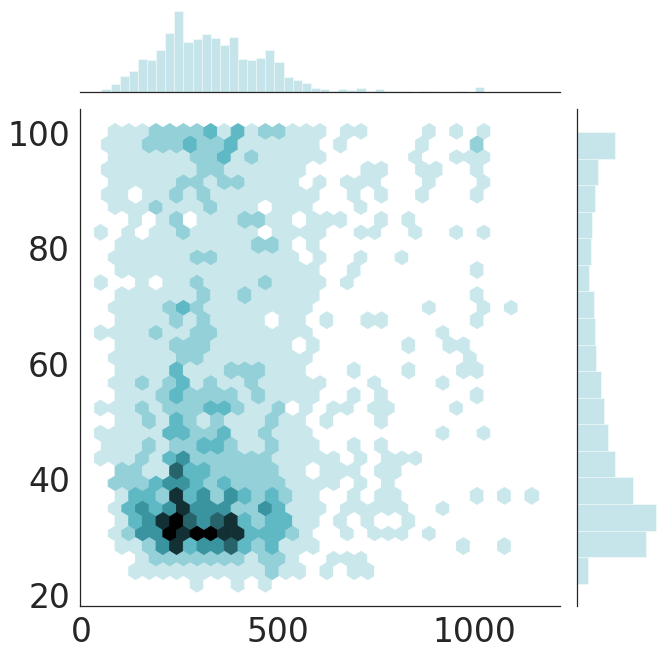

In [8]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,[x*100 for x in idents],kind="hex",color="#70C0CB",height=10,bins=8)


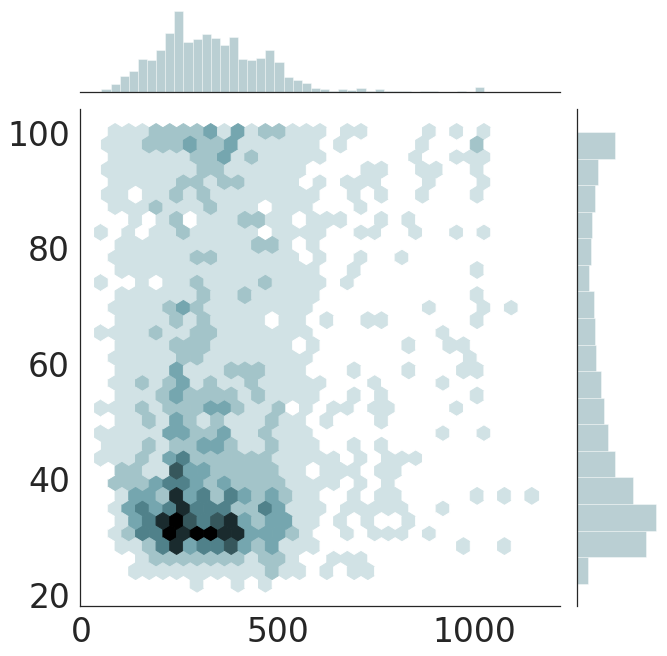

In [15]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,[x*100 for x in idents],kind="hex",color="#548891",height=10,bins=8)


In [77]:
classes_over_90 = []
for key,values in hits.items():
    for value in values:
        if float(value[1]) >0.9:
            classes_over_90.append(key)

In [80]:
unique_classes_over_90 = list(set(classes_over_90))

In [90]:
unique_lengths = []
[unique_lengths.append(ec_classes_length[x]) for x in  unique_classes_over_90 ]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

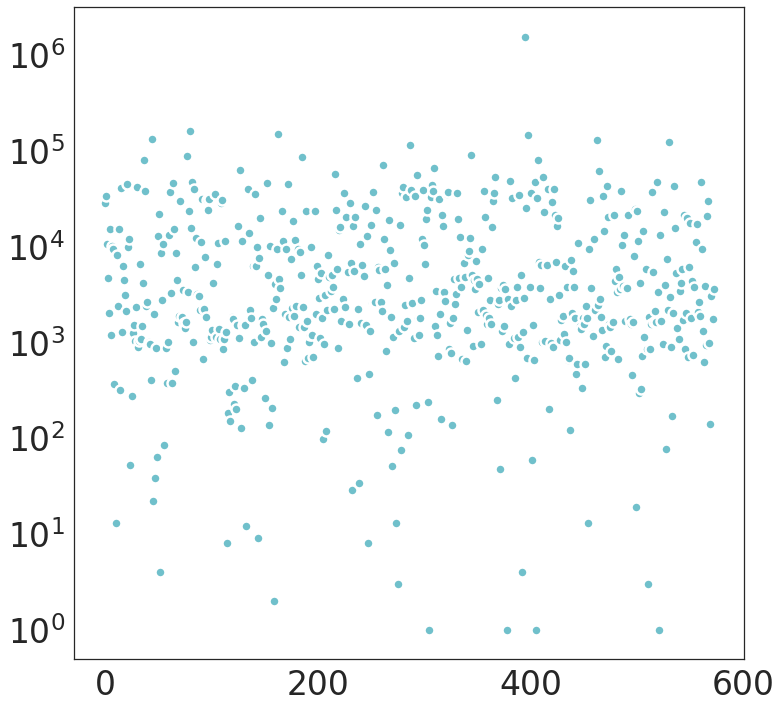

In [112]:
fig = plt.figure(figsize=(12,12))

plt.plot(unique_lengths,'o', color="#70C0CB",markeredgecolor="white", markersize=10, markeredgewidth=2.5)
plt.yscale('log')
plt.savefig('/agh/projects/noelia/NLP/zymCTRL/figs/figs3.png', dpi=1200)

/agh/projects/noelia/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/distributions.py:423: UserWarning: The following kwargs were not used by contour: 'kind', 'fill'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


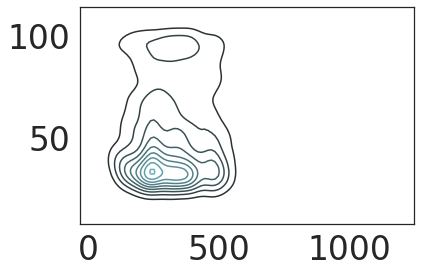

In [249]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.kdeplot(lengths,[x*100 for x in idents],kind="hex",color="#70C0CB",fill=True)


# For those classes, what do the other hits identities look like? 

# Cluster each class independently; First: Save one fasta file per class

In [19]:
#All sequences in BRENDA - eval + train datasets


In [178]:
#all brenda
brenda_fasta = open('/agh/projects/noelia/NLP/zymCTRL/dataset_preparation/brenda_uniprot.txt','r')
EC_sequences={}
brenda_fasta.readline()
for line in brenda_fasta:
    columns = line.split('\t')
    if ';' in columns[5]: continue
    if columns[5] not in EC_sequences:
        EC_sequences[columns[5]] = []
        EC_sequences[columns[5]].append(columns[6].strip())
    else:
        EC_sequences[columns[5]].append(columns[6].strip())
brenda_fasta.close()

KeyboardInterrupt: 

In [ ]:
#eval_sequences
import pickle
with open('/agh/projects/noelia/NLP/zymCTRL/sequences/sequences_eval.pkl', 'rb') as file:
    # A new file will be created
    sequences_eval = pickle.load(file)

In [4]:
for key,sequences in sequences_eval.items():
    sequences_eval[key] = []
    for sequence in sequences:
        if sequence.startswith('<start>'):
            sequences_eval[key].append(sequence.split('<start>')[1].split('<end>')[0])
        else:
            sequences_eval[key].append(sequence)


In [5]:
for key,sequences in EC_sequences.items():
    if key in sequences_eval:
        EC_sequences[key] = list(set(sequences).difference(sequences_eval[key]))
    

In [6]:
sequences_train = {}
for key,sequences in EC_sequences.items():
    if len(sequences) == 0: continue
    sequences_train[key] = sequences


In [7]:
len(sequences_train)

5999

In [8]:
import pickle
with open('/agh/projects/noelia/NLP/zymCTRL/sequences/sequences_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(sequences_train,file)

In [9]:
# make directory and write out files for each class
for key,sequences in sequences_train.items():
    if not key: continue
    path = '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas'
    if os.path.exists(f'{path}/{key}/'):
        #os.mkdir(f'{path}/{key}/')
        continue
    else:
        os.mkdir(f'{path}/{key}/')
        for index,sequence in enumerate(sequences):
            newfile = open(f'/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/{key}/{key}_{index}.fasta' ,'w')
            newfile.write(f'>{key}_{index}\n')
            newfile.write(f'{sequence}\n')
            newfile.close()          

# Clusters per class

#### Clustering at 50%

In [18]:
cluster_folders = glob.glob('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/*/fiftyclusterRes_rep_seq.fasta')

In [19]:
len(cluster_folders)

3486

In [20]:
#fifty_clusters = {}
for cluster_folder in cluster_folders:
    folder = cluster_folder.split('/')[-2]
    if folder in fifty_clusters:
        continue
    cluster_file = open(cluster_folder)
    dumped_data = cluster_file.readlines()
    totals = sum('>' in x for x in dumped_data)
    fifty_clusters[folder] = totals

In [21]:
len(fifty_clusters)

3486

In [24]:
import pickle
file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fifty.pkl','wb')
pickle.dump(fifty_clusters, file)

#### Clustering at 90%

In [33]:
cluster_folders_90 = glob.glob('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/*/clusterRes_rep_seq.fasta')


In [34]:
len(cluster_folders_90)

3391

In [35]:
cluster_folders_90

['/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/1.14.11.40/clusterRes_rep_seq.fasta',
 '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/1.16.1.5/clusterRes_rep_seq.fasta',
 '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/1.14.11.37/clusterRes_rep_seq.fasta',
 '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/2.4.1.149/clusterRes_rep_seq.fasta',
 '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/1.1.1.237/clusterRes_rep_seq.fasta',
 '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/1.14.12.11/clusterRes_rep_seq.fasta',
 '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/5.1.3.23/clusterRes_rep_seq.fasta',
 '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/3.1.1.8/clusterRes_rep_seq.fasta',
 '/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis

In [36]:
ninety_clusters = {}
for cluster_folder in cluster_folders_90:
    folder = cluster_folder.split('/')[-2]
    #if folder in fifty_clusters:
    #    continue
    cluster_file = open(cluster_folder, encoding = "ISO-8859-1")
    dumped_data = cluster_file.readlines()
    totals = [x for x in dumped_data if '>' in x]
    ninety_clusters[folder] = len(totals)
    

In [37]:
len(ninety_clusters)

3391

In [38]:
file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/ninety.pkl','wb')
pickle.dump(ninety_clusters, file)

### Plotting

In [39]:
import pandas as pd

In [40]:
ninety_clusters

{'1.14.11.40': 23,
 '1.16.1.5': 1,
 '1.14.11.37': 25,
 '2.4.1.149': 11,
 '1.1.1.237': 8,
 '1.14.12.11': 6,
 '5.1.3.23': 409,
 '3.1.1.8': 11,
 '2.1.1.169': 6,
 '2.1.1.187': 1027,
 '5.1.3.3': 9830,
 '4.1.1.111': 4362,
 '1.14.19.14': 1,
 '1.6.2.2': 3137,
 '2.4.1.13': 1118,
 '5.3.99.5': 18,
 '1.4.1.23': 224,
 '1.14.14.108': 12,
 '2.4.1.64': 223,
 '4.1.3.42': 3,
 '2.4.2.42': 7,
 '1.13.11.69': 1,
 '2.3.1.117': 5607,
 '1.1.1.1': 7194,
 '1.1.3.12': 20,
 '2.3.1.160': 2199,
 '2.4.1.80': 52,
 '1.3.5.2': 11253,
 '1.6.3.5': 141,
 '1.14.19.69': 9,
 '1.14.14.102': 4,
 '2.4.1.19': 101,
 '1.14.14.175': 2,
 '1.1.99.3': 955,
 '4.-.-.-': 8390,
 '2.3.1.184': 3203,
 '1.14.14.57': 2,
 '1.13.11.14': 4,
 '1.13.11.63': 1059,
 '5.3.3.14': 140,
 '1.1.1.330': 497,
 '2.4.1.143': 651,
 '2.4.1.134': 25,
 '1.1.1.347': 15,
 '1.8.5.3': 951,
 '2.3.3.15': 100504,
 '5.1.3.29': 102,
 '2.1.1.163': 8682,
 '3.1.1.2': 1289,
 '2.1.1.114': 32,
 '5.1.3.9': 2636,
 '1.3.1.22': 550,
 '2.3.1.287': 3,
 '2.3.1.65': 9,
 '2.3.1.12': 8660,

In [41]:
d50 = {}
for key,value in fifty_clusters.items():
    d50[key] = ['50',key,value]
d90 = {}
for key,value in ninety_clusters.items():
    d90[key] = ['90',key,value]

In [42]:
# outlier?
[(key,value) for key,value in d90.items() if value[2] > 100000]

[('2.3.3.15', ['90', '2.3.3.15', 100504]),
 ('5.2.1.8', ['90', '5.2.1.8', 115696]),
 ('2.1.1.222', ['90', '2.1.1.222', 139272]),
 ('1.3.99.1', ['90', '1.3.99.1', 106093]),
 ('1.4.99.5', ['90', '1.4.99.5', 323125])]

In [43]:
del d90['2.3.3.15']
del d90['2.3.3.15']
del d90['2.3.3.15']
del d90['2.3.3.15']
del d90['2.3.3.15']

KeyError: '2.3.3.15'

In [45]:
d50['1.14.11.40'] + d90['1.14.11.40']

['50', '1.14.11.40', 13, '90', '1.14.11.40', 23]

In [46]:
# import pandas as pd
import pandas as pd

# List1
lst = list(d50.values()) + list(d90.values())

df = pd.DataFrame(lst, columns =['Cluster_type', 'Label', 'Cluster_value'])
df


,Cluster_type,Label,Cluster_value
0,50,1.14.11.40,13
1,50,1.16.1.5,1
2,50,1.14.11.37,16
3,50,2.4.1.149,8
4,50,1.1.1.237,4
5,50,1.14.12.11,3
6,50,5.1.3.23,48
7,50,3.1.1.8,6
8,50,2.1.1.169,1
9,50,2.1.1.187,158


KeyboardInterrupt: 

<Figure size 1152x720 with 0 Axes>

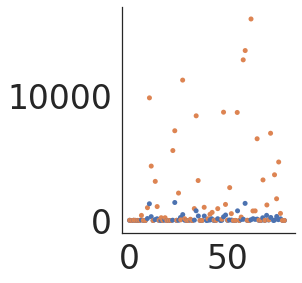

In [47]:
grid = plt.figure(figsize=(16,10))
sns.set(style="white", color_codes=True,font_scale=3)
sns.catplot(data=df, x="Label", y='Cluster_value', hue="Cluster_type")
grid.show()

In [49]:
d={}
for key,value in d50.items():
    if key not in d90:
        continue
    d[key] = [value[2],d90[key][2]]    

In [50]:
clusters_list = [[key,x[0],x[1]] for key,x in d.items()]
clusters_list.sort(key = lambda x: x[1], reverse=True)

In [51]:
chunks = []
list_chunked = [clusters_list[i:i + 250] for i in range(0, len(clusters_list), 250)]
for chunk in list_chunked:
    random.shuffle(chunk)
    chunks.append(chunk)
flattened_l = [item for chunk in chunks for item in chunk]

In [52]:
x90 = [index for index, x in enumerate(clusters_list)]
y50 = [x[1] for x in clusters_list]
y90 = [x[2] for x in clusters_list]

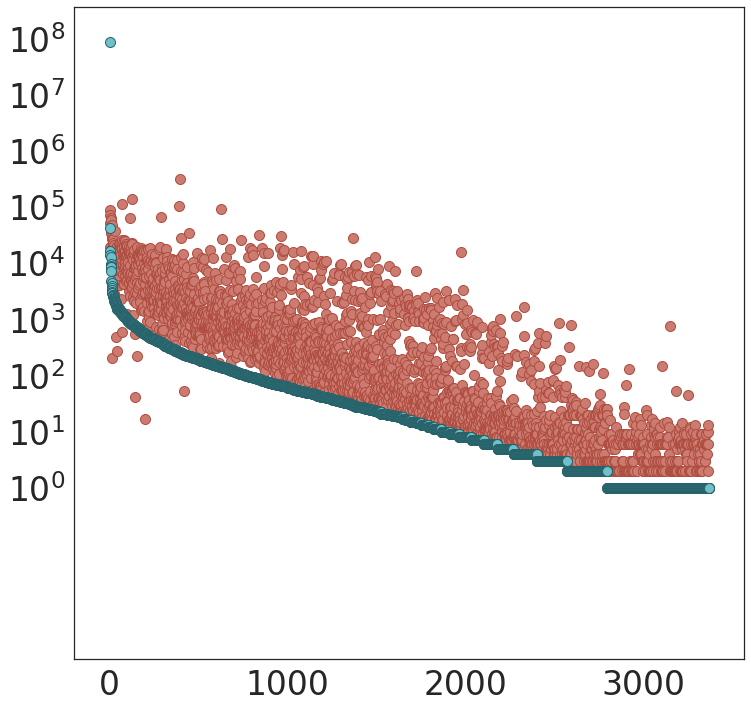

In [79]:
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.yticks([1,10,100,1000,10000,100000,1000000,10000000,100000000])

plt.scatter(x90, y90, s=100,edgecolor="#af4d40", color="#C88A64",linewidth=1)

plt.scatter(x90, y50, s=100,edgecolor="#29556C", color="#8BB1B6",linewidth=1)
plt.savefig('/agh/projects/noelia/NLP/zymCTRL/figs/fig2b.png', dpi=1200)

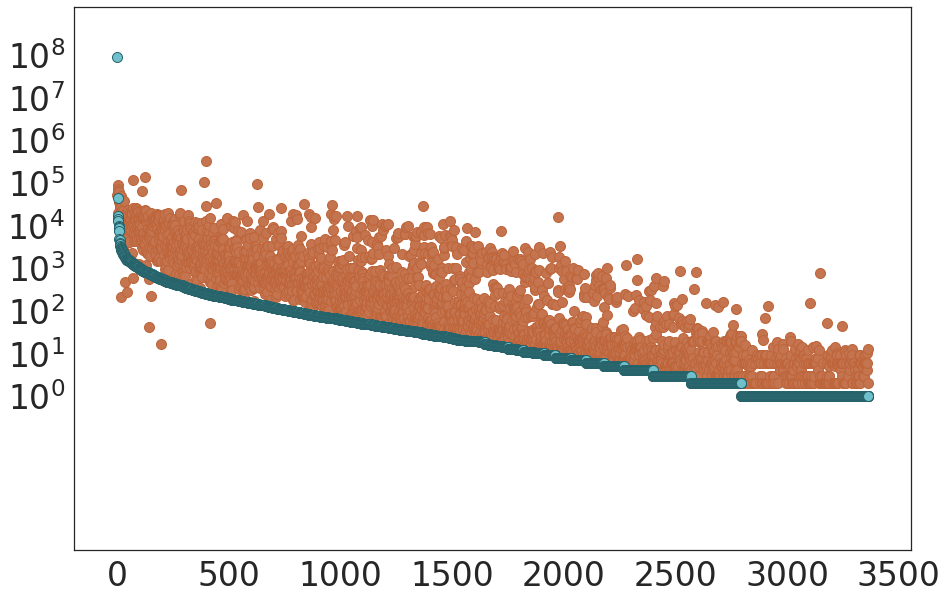

In [61]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_yscale('log')

plt.yticks([1,10,100,1000,10000,100000,1000000,10000000,100000000])

plt.scatter(x90, y90, s=100,edgecolor="#BE653B", color="#C4744E",linewidth=1)

plt.scatter(x90, y50, s=100,edgecolor="#27636b", color="#70C0CB",linewidth=1)
plt.savefig('/agh/projects/noelia/NLP/zymCTRL/figs/fig2b.png', dpi=1200)

In [38]:
sns.scatterplot(data=df)

<AxesSubplot:>

ValueError: Image size of 534x73067 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [76]:
[x for x in y if x > 1000000 ]

[89335842]

#### Pick label for generation

In [189]:
print(flattened_l[2])
print(flattened_l[1683])
print(flattened_l[3364])

['2.3.1.4', 481, 3304]
['1.1.1.391', 19, 37]
['3.1.1.55', 1, 1]


In [185]:
len(flattened_l)

3367

# Look at the generation results for each of these separated labels

## 2.3.1.4

In [3]:
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/2.3.1.4/alnRes1')

In [4]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]
    if columns[0] in hits: 
        continue
    else:
        hits[gen_hit] = [columns[1], columns[2], columns[3]]
brenda_matches.close()

In [5]:
idents = [float(x[1])*100 for x in hits.values() ]
lengths  = [int(x[2]) for x in hits.values() ]

In [6]:
print(len(idents))

856


(0, 110)

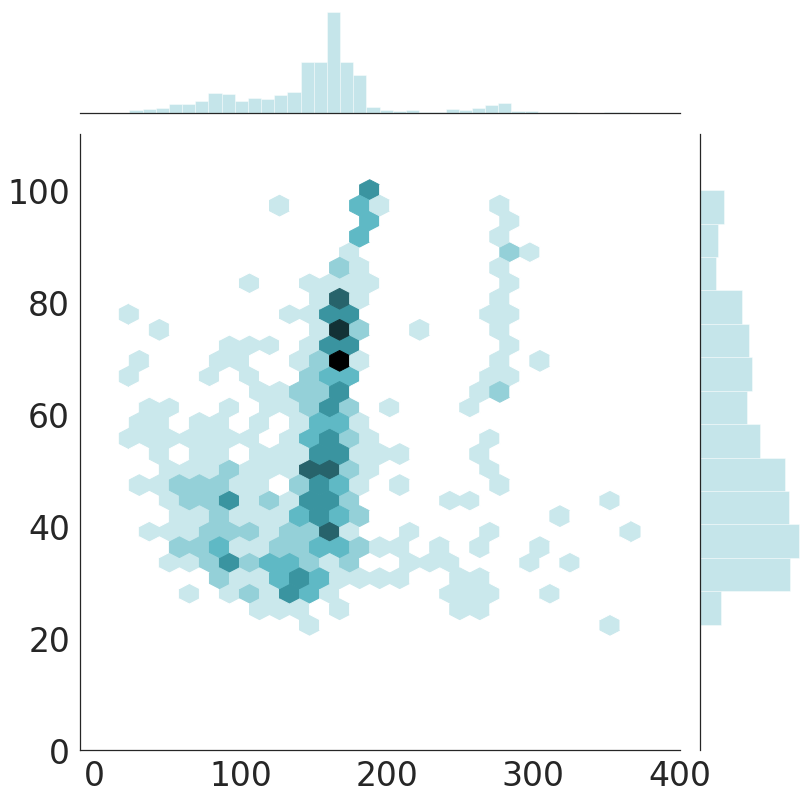

In [7]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,idents,kind="hex",color="#70C0CB",height=12,bins=8)

g.ax_marg_x.set_xlim(-10, 400)
g.ax_marg_y.set_ylim(0, 110)

In [7]:
# polar attempts



In [8]:
min(idents)

22.400000000000002

[]

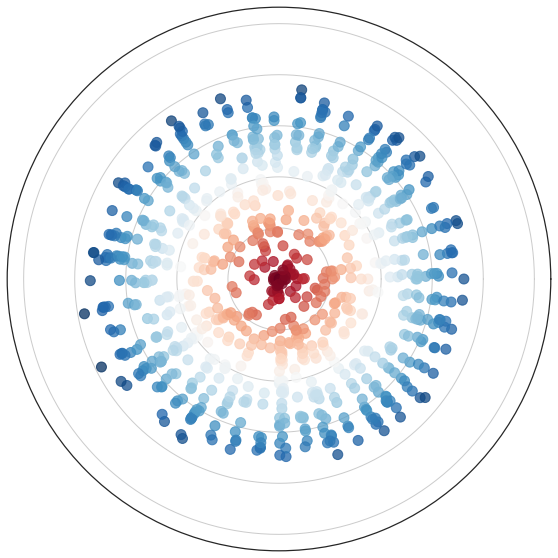

<Figure size 432x288 with 0 Axes>

In [9]:

fig = plt.figure(figsize=(16,10))

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
idents_diff = [(100 - x) for x in idents]
theta = [random.randrange(0,100) for x in idents]
colors = [x/100 for x  in idents_diff]

plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, idents_diff, c=colors,s=100, cmap='RdBu', alpha=0.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, np.pi, 0, endpoint=False))

## 1.1.1.391

In [10]:
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/1.1.1.391/alnRes1')

In [11]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]
    if columns[0] in hits: 
        continue
    else:
        hits[gen_hit] = [columns[1], columns[2], columns[3]]
brenda_matches.close()

In [12]:
idents = [float(x[1])*100 for x in hits.values() ]
lengths  = [int(x[2]) for x in hits.values() ]

In [13]:
print(len(idents))

989


In [14]:
min(idents)
[lengths[index] for index,x in enumerate(idents) if x == 22.0]

[232]

(0, 110)

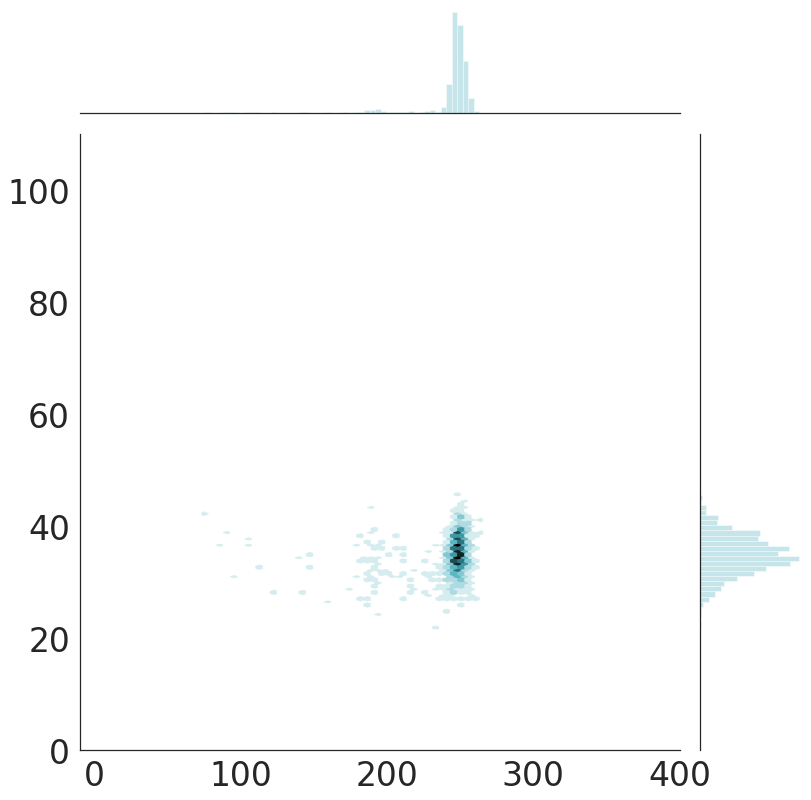

In [15]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,idents,kind="hex",color="#70C0CB",height=12,bins=10)

g.ax_marg_x.set_xlim(-10, 400)
g.ax_marg_y.set_ylim(0, 110)

[]

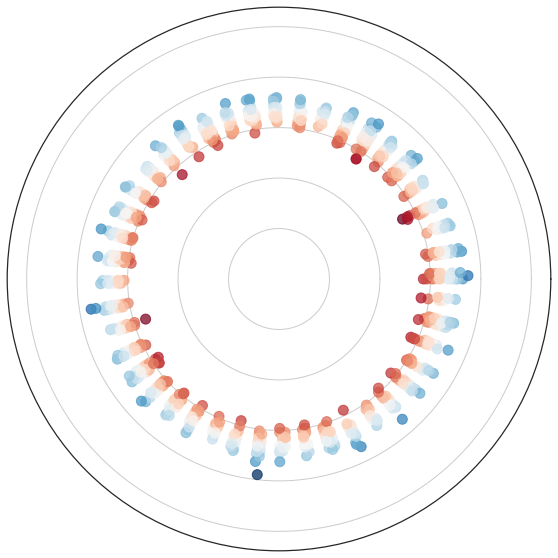

<Figure size 432x288 with 0 Axes>

In [16]:

fig = plt.figure(figsize=(16,10))

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
idents_diff = [(100 - x) for x in idents]
theta = [random.randrange(0,100) for x in idents]
colors = [x/100 for x  in idents_diff]

plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, idents_diff, c=colors,s=100, cmap='RdBu', alpha=0.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, np.pi, 0, endpoint=False))

In [2]:
#### How many clusters had each of these examples?
import pickle
file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fifty.pkl','rb')
fifty_clusters = pickle.load(file)

In [13]:
fifty_clusters['2.3.1.4']

481

In [14]:
fifty_clusters['1.1.1.391']

19

## 3.1.1.55

In [39]:
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/3.1.1.55/alnRes1')


In [40]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]
    if columns[0] in hits: 
        continue
    else:
        hits[gen_hit] = [columns[1], columns[2], columns[3]]
brenda_matches.close()

In [41]:
hits

{'3.1.1.55_54_37': ['3.1.1.55_0', '0.700', '10'],
 '3.1.1.55_84_48': ['3.1.1.55_0', '0.440', '25'],
 '3.1.1.55_86_14': ['3.1.1.55_0', '0.571', '14'],
 '3.1.1.55_86_43': ['3.1.1.55_0', '0.523', '21'],
 '3.1.1.55_71_40': ['3.1.1.55_0', '0.478', '23'],
 '3.1.1.55_76_34': ['3.1.1.55_0', '0.562', '16'],
 '3.1.1.55_13_66': ['3.1.1.55_0', '1.000', '5'],
 '3.1.1.55_31_75': ['3.1.1.55_0', '0.500', '20'],
 '3.1.1.55_33_13': ['3.1.1.55_0', '0.636', '11'],
 '3.1.1.55_34_69': ['3.1.1.55_0', '0.363', '22'],
 '3.1.1.55_47_53': ['3.1.1.55_0', '0.750', '8'],
 '3.1.1.55_69_80': ['3.1.1.55_0', '0.833', '6'],
 '3.1.1.55_63_88': ['3.1.1.55_0', '0.578', '19'],
 '3.1.1.55_74_41': ['3.1.1.55_0', '0.434', '23'],
 '3.1.1.55_13_4': ['3.1.1.55_0', '0.700', '10'],
 '3.1.1.55_79_63': ['3.1.1.55_0', '0.529', '17'],
 '3.1.1.55_80_6': ['3.1.1.55_0', '0.642', '14'],
 '3.1.1.55_70_79': ['3.1.1.55_0', '0.642', '14'],
 '3.1.1.55_80_9': ['3.1.1.55_0', '1.000', '4'],
 '3.1.1.55_81_6': ['3.1.1.55_0', '0.500', '22'],
 '3.1.1.

In [49]:
idents = [ float(x[1])*100 for x in hits.values() if int(x[2])>20 ]
lengths  = [ int(x[2]) for x in hits.values() if int(x[2])>20 ]

In [50]:
print(len(idents))

117


In [45]:
max(idents)

57.099999999999994

In [46]:
[lengths[index] for index,x in enumerate(idents) if x == 100.0] # the 337 it's to itself..

[]

(0, 110)

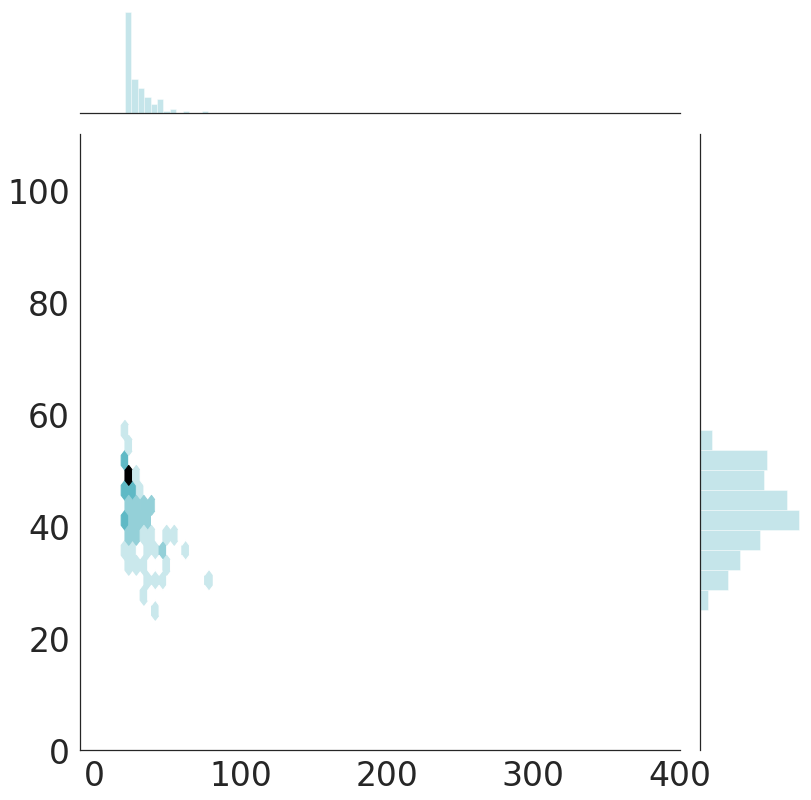

In [51]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,idents,kind="hex",color="#70C0CB",height=12,bins=8)
g.ax_marg_x.set_xlim(-10, 400)
g.ax_marg_y.set_ylim(0, 110)

[]

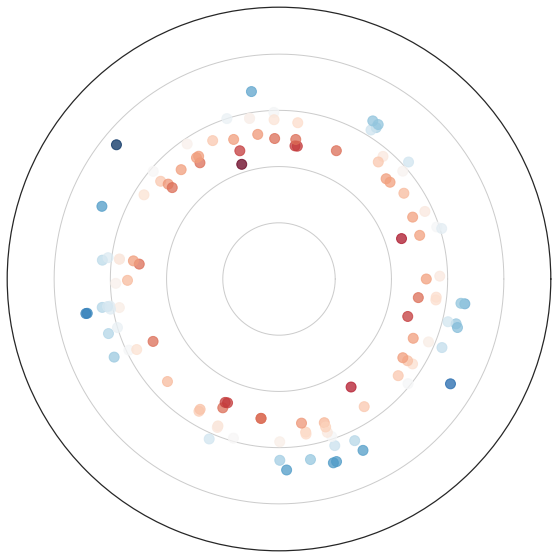

<Figure size 432x288 with 0 Axes>

In [52]:

fig = plt.figure(figsize=(16,10))

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
idents_diff = [(100 - x) for x in idents]
theta = [random.randrange(0,100) for x in idents]
colors = [x/100 for x  in idents_diff]

plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, idents_diff, c=colors,s=100, cmap='RdBu', alpha=0.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, np.pi, 0, endpoint=False))

## 5.3.3.14

In [117]:
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/5.3.3.14/alnres')

In [118]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]
    if columns[0] in hits: 
        continue
    else:
        hits[gen_hit] = [columns[1], columns[2], columns[3]]
brenda_matches.close()

In [119]:
idents = [float(x[1])*100 for x in hits.values() ]
lengths  = [int(x[2]) for x in hits.values() ]

In [120]:
print(len(idents))

693


In [121]:
hits

{'5.3.3.14_74_84': ['5.3.3.14_41', '0.355', '114'],
 '5.3.3.14_16_94': ['5.3.3.14_193', '0.469', '65'],
 '5.3.3.14_18_3': ['5.3.3.14_13', '0.340', '188'],
 '5.3.3.14_9_10': ['5.3.3.14_70', '0.428', '44'],
 '5.3.3.14_16_98': ['5.3.3.14_0', '0.362', '86'],
 '5.3.3.14_79_92': ['5.3.3.14_4', '0.294', '133'],
 '5.3.3.14_74_86': ['5.3.3.14_106', '0.298', '188'],
 '5.3.3.14_7_91': ['5.3.3.14_155', '0.309', '68'],
 '5.3.3.14_80_98': ['5.3.3.14_93', '0.490', '53'],
 '5.3.3.14_5_32': ['5.3.3.14_204', '0.318', '89'],
 '5.3.3.14_83_62': ['5.3.3.14_78', '0.406', '59'],
 '5.3.3.14_80_59': ['5.3.3.14_63', '0.326', '90'],
 '5.3.3.14_44_97': ['5.3.3.14_188', '0.565', '43'],
 '5.3.3.14_13_79': ['5.3.3.14_196', '0.411', '51'],
 '5.3.3.14_12_59': ['5.3.3.14_0', '0.515', '64'],
 '5.3.3.14_26_39': ['5.3.3.14_150', '0.392', '49'],
 '5.3.3.14_50_89': ['5.3.3.14_167', '0.271', '101'],
 '5.3.3.14_51_25': ['5.3.3.14_140', '0.369', '80'],
 '5.3.3.14_45_17': ['5.3.3.14_108', '0.370', '54'],
 '5.3.3.14_28_10': ['5.

[]

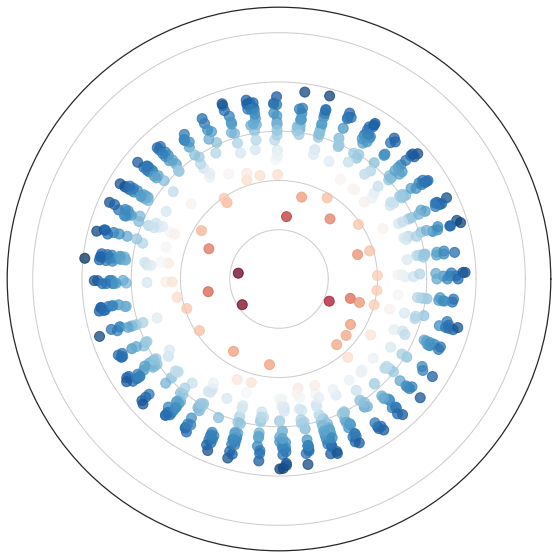

<Figure size 432x288 with 0 Axes>

In [122]:

fig = plt.figure(figsize=(16,10))

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
idents_diff = [(100 - x) for x in idents]
theta = [random.randrange(0,100) for x in idents]
colors = [x/100 for x  in idents_diff]

plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, idents_diff, c=colors,s=100, cmap='RdBu', alpha=0.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, np.pi, 0, endpoint=False))

(0, 110)

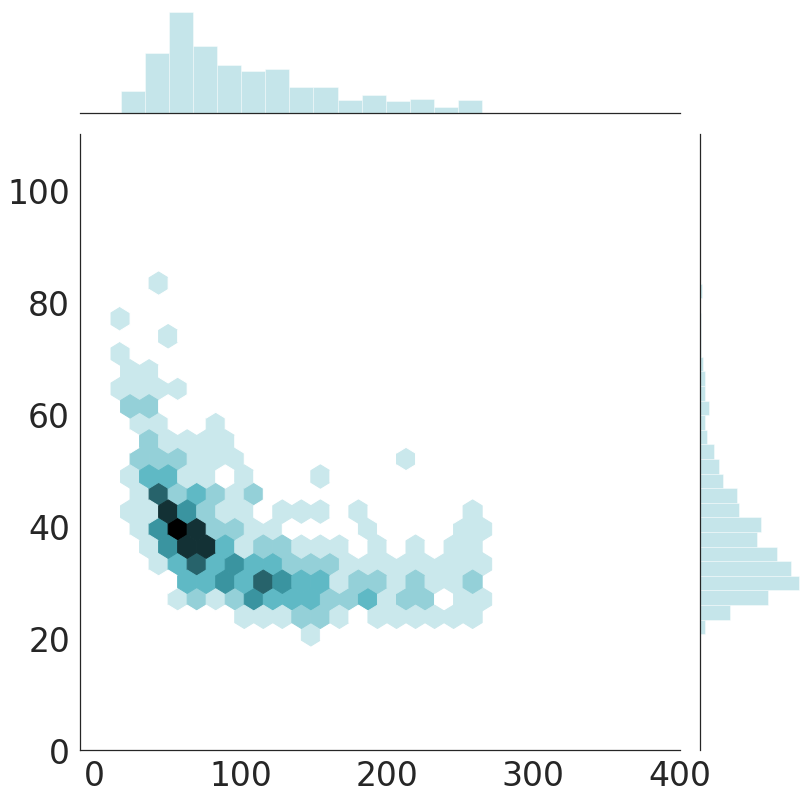

In [123]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,idents,kind="hex",color="#70C0CB",height=12,bins=8)
g.ax_marg_x.set_xlim(-10, 400)
g.ax_marg_y.set_ylim(0, 110)

## 1.13.12.2

In [148]:
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/1.13.12.2/alnres')


In [149]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]
    if columns[0] in hits: 
        continue
    else:
        hits[gen_hit] = [columns[1], columns[2], columns[3]]
brenda_matches.close()

In [150]:
idents = [float(x[1])*100 for x in hits.values() ]
lengths  = [int(x[2]) for x in hits.values() ]

In [153]:
len(idents)

469

[]

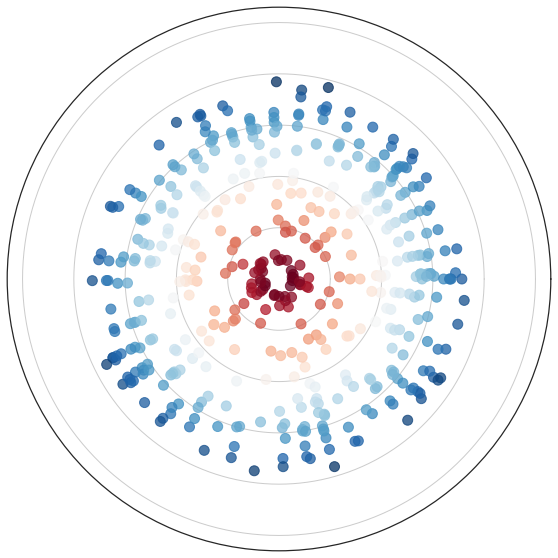

<Figure size 432x288 with 0 Axes>

In [151]:

fig = plt.figure(figsize=(16,10))

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
idents_diff = [(100 - x) for x in idents]
theta = [random.randrange(0,100) for x in idents]
colors = [x/100 for x  in idents_diff]

plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, idents_diff, c=colors,s=100, cmap='RdBu', alpha=0.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, np.pi, 0, endpoint=False))

(0, 110)

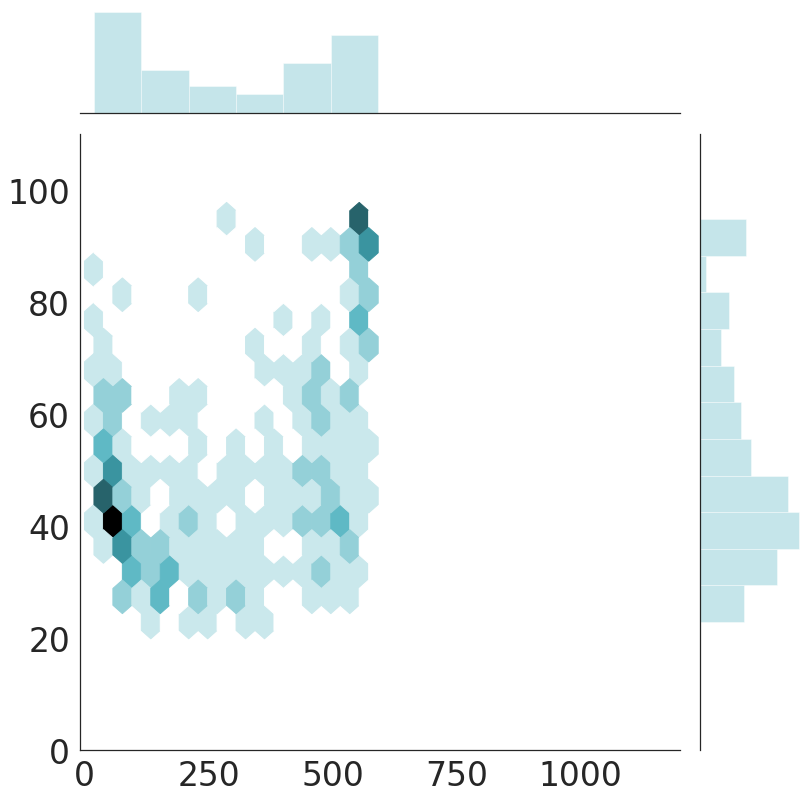

In [159]:
sns.set(style="white", color_codes=True,font_scale=3)
joint_kws=dict(gridsize=15)
g = sns.jointplot(lengths,idents,kind="hex",color="#70C0CB",height=12,bins=8, joint_kws= joint_kws)
g.ax_marg_x.set_xlim(-10, 1200)
g.ax_marg_y.set_ylim(0, 110)

# And to all brenda?

In [55]:
#1.1.1.391
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/1.1.1.391/all_brenda_res')


In [56]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]
    if columns[0] in hits: 
        continue
    else:
        hits[gen_hit] = [columns[1], columns[2], columns[3]]
brenda_matches.close()

In [57]:
idents = [float(x[1])*100 for x in hits.values() ]
lengths  = [int(x[2]) for x in hits.values() ]

[]

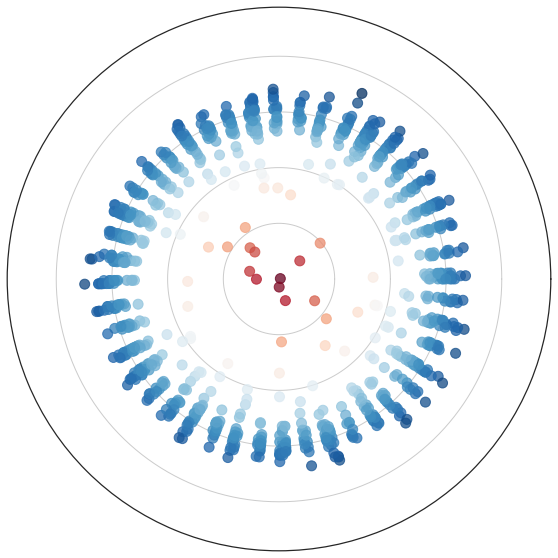

<Figure size 432x288 with 0 Axes>

In [58]:

fig = plt.figure(figsize=(16,10))

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
idents_diff = [(100 - x) for x in idents]
theta = [random.randrange(0,100) for x in idents]
colors = [x/100 for x  in idents_diff]

plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, idents_diff, c=colors,s=100, cmap='RdBu', alpha=0.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, np.pi, 0, endpoint=False))

(0, 110)

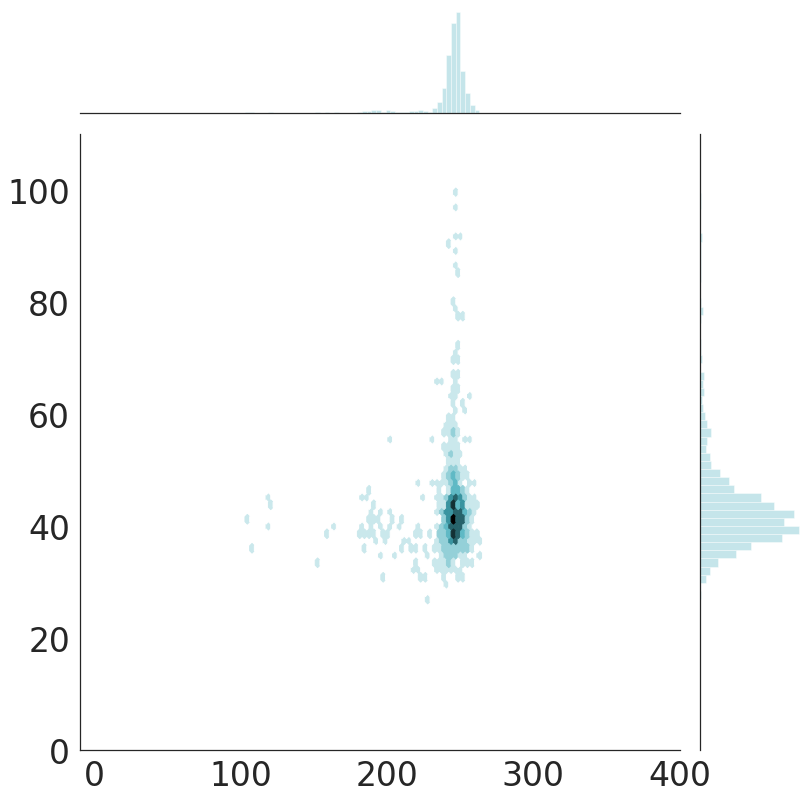

In [59]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,idents,kind="hex",color="#70C0CB",height=12,bins=8)
g.ax_marg_x.set_xlim(-10, 400)
g.ax_marg_y.set_ylim(0, 110)

# Why the enormous differences between 1.1.1.391 and 2.3.1.4?

In [3]:
with open('/agh/projects/noelia/NLP/zymCTRL/dataset_preparation/ec_classes_freq-train.pkl', 'rb') as file:
    # A new file will be created
    ec_classes_length = pickle.load(file)

In [135]:
ec_classes_length['2.3.1.4']

4861

In [136]:
ec_classes_length['1.1.1.391']

44

In [137]:
ec_classes_length['3.1.1.55']

1

In [138]:
file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fifty.pkl','rb')
fifty_clusters = pickle.load(file)

In [139]:
fifty_clusters['2.3.1.4']

481

In [140]:
fifty_clusters['1.1.1.391']

19

In [141]:
ec_classes_length['3.1.1.55']

1

In [7]:
ec_classes_length['4.2.1.1']

52213

In [8]:
44837/fifty_clusters['4.2.1.1']

16.174963924963926

In [5]:
fifty_clusters['4.2.1.1']

2772

In [142]:
# How many sequences per cluster?

In [146]:
clusters_2_file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/2.3.1.4/fiftyclusterRes_cluster.tsv','r')



In [147]:
clusters_2 = {}
for line in clusters_2_file:
    rep, seq = line.split()
    if rep not in clusters_2:
        clusters_2[rep] = []
    clusters_2[rep].append(seq)
clusters_2_file.close()

In [168]:
4861/481

10.106029106029107

(-1, 482)

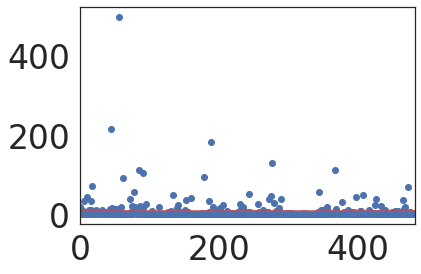

In [170]:
plt.scatter([index for index, s in enumerate(clusters_2.keys())],[len(x) for x in clusters_2.values()] )
plt.plot([-1, 482], [10.11, 10.11], 'k-', color = 'r')
plt.xlim(-1, 482)

In [154]:
max([len(x) for x in clusters_2.values()] )

498

In [176]:
len([len(x) for x in clusters_2.values() if len(x)>10.11 ])/498

0.1465863453815261

In [158]:
clusters_1_file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fastas/1.1.1.391/fiftyclusterRes_cluster.tsv','r')
clusters_1 = {}
for line in clusters_1_file:
    rep, seq = line.split()
    if rep not in clusters_1:
        clusters_1[rep] = []
    clusters_1[rep].append(seq)
clusters_1_file.close()


(-1, 20)

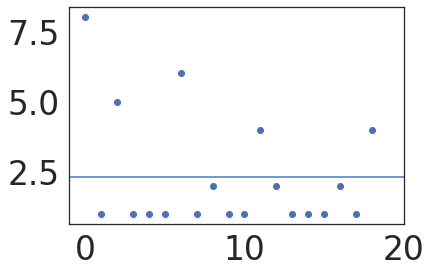

In [167]:
plt.scatter([index for index, s in enumerate(clusters_1.keys())],[len(x) for x in clusters_1.values()] )
plt.plot([-1, 20], [2.315, 2.315], 'k-', color = 'b')
plt.xlim(-1, 20)


In [157]:
44/19

2.3157894736842106

In [177]:
len([len(x) for x in clusters_1.values() if len(x)>2.315 ])/19

0.2631578947368421

# Computed 2.3.1.4 against all BRENDA

In [31]:
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/3.1.1.55/all_brenda_res')


In [32]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]
    if columns[0] in hits: 
        continue
    else:
        hits[gen_hit] = [columns[1], columns[2], columns[3]]
brenda_matches.close()

In [33]:
idents = [float(x[1])*100 for x in hits.values() ]
lengths  = [int(x[2]) for x in hits.values() ]

[]

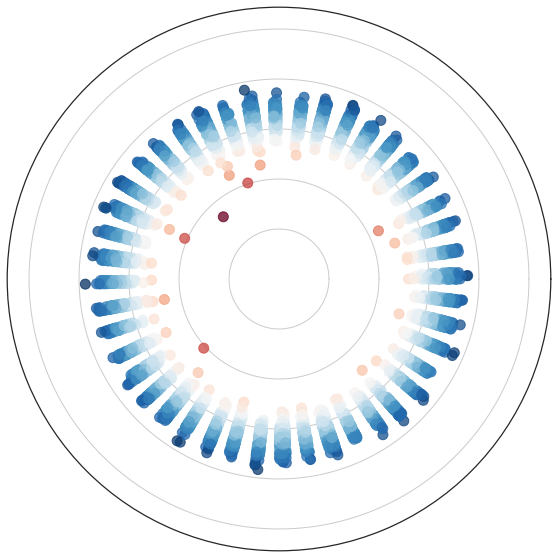

<Figure size 432x288 with 0 Axes>

In [34]:

fig = plt.figure(figsize=(16,10))

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
idents_diff = [(100 - x) for x in idents]
theta = [random.randrange(0,100) for x in idents]
colors = [x/100 for x  in idents_diff]

plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, idents_diff, c=colors,s=100, cmap='RdBu', alpha=0.75)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, np.pi, 0, endpoint=False))

(0, 110)

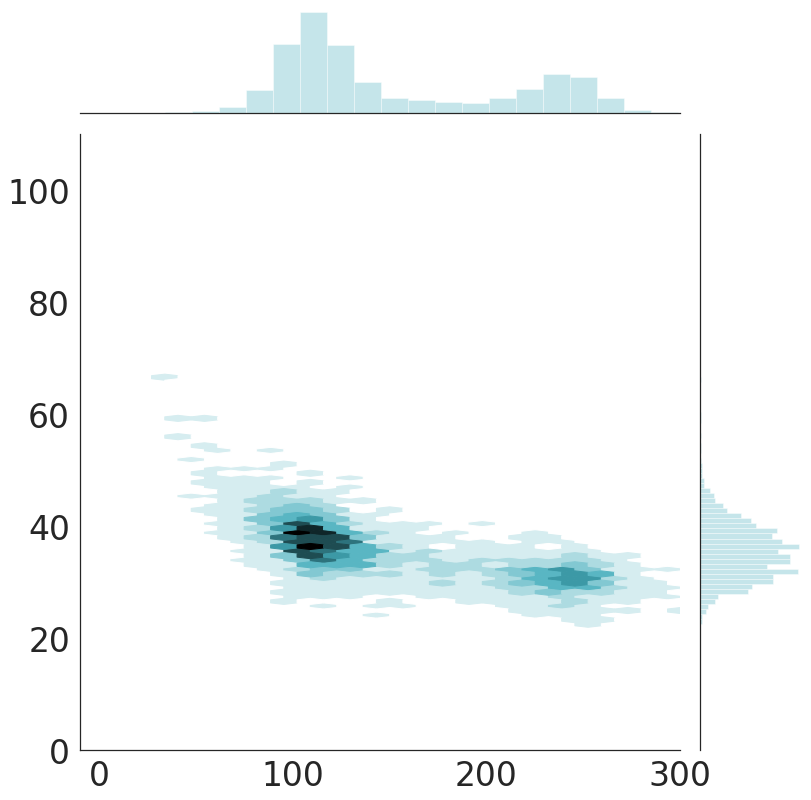

In [35]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,idents,kind="hex",color="#70C0CB",height=12,bins=10)

g.ax_marg_x.set_xlim(-10, 300)
g.ax_marg_y.set_ylim(0, 110)

In [38]:
[(key,value) for key,value in hits.items() if float(value[1]) > 0.40]

[('3.1.1.55_50_19', ['A0A3P3ZTB1', '0.411', '101']),
 ('3.1.1.55_82_55', ['A0A7W7CFT8', '0.428', '96']),
 ('3.1.1.55_42_85', ['A0A3Q9IYE1', '0.408', '114']),
 ('3.1.1.55_60_40', ['A0A378Z3B7', '0.414', '116']),
 ('3.1.1.55_80_36', ['A0A063BC41', '0.422', '112']),
 ('3.1.1.55_80_65', ['A0A2K8P7S8', '0.452', '84']),
 ('3.1.1.55_74_49', ['A0A8D9KE43', '0.482', '112']),
 ('3.1.1.55_13_86', ['A0A3N6I9N2', '0.422', '95']),
 ('3.1.1.55_31_37', ['Q0RD29', '0.417', '140']),
 ('3.1.1.55_68_56', ['A0A540VH70', '0.410', '100']),
 ('3.1.1.55_69_27', ['A0A2I2KZB4', '0.435', '108']),
 ('3.1.1.55_4_46', ['A0A485BKD5', '0.443', '95']),
 ('3.1.1.55_48_24', ['A0A7K0DGN2', '0.402', '87']),
 ('3.1.1.55_51_32', ['A0A367AH56', '0.430', '149']),
 ('3.1.1.55_90_58', ['A0A151AGU6', '0.425', '101']),
 ('3.1.1.55_66_78', ['A0A011MY80', '0.439', '89']),
 ('3.1.1.55_17_93', ['A0A399GV10', '0.441', '101']),
 ('3.1.1.55_1_89', ['A0A2P2EBF7', '0.406', '95']),
 ('3.1.1.55_20_28', ['A0A0K3A6E7', '0.415', '88']),
 ('3.1.

In [37]:
1.1.1.47 1.1.1.47 1.1.1.100  1.1.1.100 1.1.1.100 1.1.1.100 1.1.1.100 

SyntaxError: invalid syntax (<ipython-input-37-2e82b2cafdcf>, line 1)

# Select another example for middle plot

In [18]:
import pickle

In [19]:
file = open('/agh/projects/noelia/NLP/zymCTRL/dataset_preparation/ec_classes_freq-train.pkl', 'rb')
ec_classes_length = pickle.load(file)

In [20]:
file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/fifty.pkl','rb')
fifty_clusters = pickle.load(file)

In [31]:
file = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/cluster_classes/ninety.pkl','rb')
ninety_clusters = pickle.load(file)

In [32]:
ninety_clusters

{'7.2.2.5': 1,
 '7.2.2.10': 7002,
 '7.2.1.1': 12034,
 '7.1.1.9': 19317,
 '7.2.2.14': 2927,
 '7.2.2.13': 14,
 '7.2.2.19': 20,
 '7.2.2.1': 3,
 '7.2.1.2': 6,
 '7.2.2.21': 4,
 '7.1.2.1': 1409,
 '7.2.2.11': 10,
 '7.2.2.-': 1967,
 '7.2.2.3': 1,
 '7.2.2.4': 2,
 '7.2.2.16': 1,
 '7.1.3.1': 5313,
 '7.1.2.2': 20175,
 '7.2.2.12': 1,
 '7.2.1.-': 12,
 '7.2.1.3': 792,
 '7.2.2.20': 53,
 '7.2.2.15': 1,
 '5.4.2.7': 242}

In [128]:
ec_classes_length

{'3.4.16.4': 71713,
 '4.1.1.81': 8648,
 '7.1.1.-': 380300,
 '3.2.1.4': 30976,
 '2.7.7.76': 658,
 '1.17.7.4': 30778,
 '2.7.7.58': 2384,
 '2.7.8.26': 20298,
 '4.3.1.3': 20564,
 '2.2.1.6': 83236,
 '6.1.1.20': 94365,
 '2.1.3.15': 60183,
 '3.1.11.6': 61512,
 '4.2.1.17': 43832,
 '2.7.7.7': 310328,
 '4.2.99.18': 60137,
 '6.3.5.5': 79551,
 '3.6.4.12': 460379,
 '2.8.1.6': 24388,
 '2.7.2.8': 29795,
 '2.1.1.235': 87,
 '3.5.4.33': 31830,
 '': 823877,
 '1.2.1.-': 47950,
 '6.1.1.2': 52106,
 '2.4.-.-': 23453,
 '3.2.1.37': 3122,
 '2.7.8.8': 20928,
 '3.4.17.13': 2943,
 '2.7.8.-': 27428,
 '4.3.2.2': 40764,
 '1.17.1.8': 33414,
 '2.7.1.71': 39185,
 '2.7.13.3': 805073,
 '2.7.7.49': 43902,
 '1.11.1.5': 2421,
 '4.2.1.33': 74802,
 '7.1.1.9': 1564679,
 '2.4.1.129': 96983,
 '2.1.1.201': 2426,
 '3.1.4.16': 1185,
 '2.7.7.101': 37475,
 '2.7.1.90': 12847,
 '6.3.1.2': 43235,
 '2.1.1.176': 18485,
 '2.3.2.27': 145210,
 '3.4.21.-': 58598,
 '2.4.2.10': 39485,
 '2.7.11.24': 28866,
 '6.1.1.5': 50751,
 '2.1.1.220': 8913,
 

In [136]:
a=[key for key,value in fifty_clusters.items() if (ec_classes_length[key]/value >10 and ec_classes_length[key]/value < 10.30)]
                                                                                              

In [138]:
a

['5.3.3.14',
 '6.1.1.26',
 '2.1.1.17',
 '2.3.1.4',
 '1.1.1.410',
 '2.1.1.132',
 '6.2.1.44',
 '1.14.13.40',
 '4.1.2.17',
 '1.4.1.9',
 '1.2.1.22',
 '1.1.1.47',
 '1.13.12.2',
 '2.4.2.39',
 '2.4.1.187',
 '2.4.1.122',
 '5.4.3.4']

In [141]:
for i in a:
    print(i,ec_classes_length[i])

5.3.3.14 211
6.1.1.26 82
2.1.1.17 1384
2.3.1.4 4861
1.1.1.410 71
2.1.1.132 1769
6.2.1.44 185
1.14.13.40 201
4.1.2.17 4788
1.4.1.9 791
1.2.1.22 997
1.1.1.47 20356
1.13.12.2 41
2.4.2.39 71
2.4.1.187 4271
2.4.1.122 2362
5.4.3.4 72


In [134]:
fifty_clusters['5.4.3.4']

7

# High-throughput: does no.sequences/cluster affect the identity range of the generations?

In [161]:
# 1. Select 100 labels

all_ranges={}
for i in range(1,200):
    all_ranges[i]=[key for key,value in fifty_clusters.items() 
                   if (ec_classes_length[key]/value >i and ec_classes_length[key]/value < i+5)]


In [165]:
import random
all_selected = []
for i,values in all_ranges.items():
    selected = random.choice(values)
    all_selected.append(selected)
    print(selected, i)
    print(ec_classes_length[selected])
    

2.1.1.1 1
18
2.4.1.53 2
10
2.3.2.10 3
44
4.1.1.56 4
24
1.1.3.10 5
164
4.1.1.9 6
295
1.1.1.408 7
326
1.3.8.7 8
2539
1.17.4.4 9
1787
1.1.1.410 10
71
1.1.1.264 11
593
1.14.15.21 12
485
1.1.3.20 13
2242
1.14.11.2 14
6374
1.4.1.4 15
1124
4.1.2.50 16
15623
1.7.99.8 17
42
2.4.2.52 18
9199
1.3.1.94 19
1980
1.4.1.19 20
23
5.1.3.18 21
51
5.1.99.1 22
6405
3.1.2.20 23
1384
2.1.3.- 24
7255
1.3.98.3 25
17209
6.2.1.64 26
3948
2.3.1.108 27
1405
5.3.1.1 28
51191
2.1.3.9 29
922
2.4.1.183 30
1288
2.4.1.198 31
2648
5.1.3.32 32
4452
2.4.2.12 33
1205
2.1.1.242 34
6573
4.1.1.72 35
73
1.1.1.343 36
583
5.3.1.16 37
30415
2.3.1.274 38
26520
1.14.12.10 39
1561
1.1.1.94 40
35412
1.2.3.3 41
1422
6.1.1.16 42
47212
3.1.26.8 43
4533
1.1.1.22 44
44227
2.4.1.180 45
1575
4.1.3.39 46
6815
2.1.1.77 47
21646
1.13.11.1 48
3495
1.1.99.3 49
1769
1.20.4.1 50
16273
1.16.3.2 51
12891
1.16.3.2 52
12891
2.4.2.4 53
11226
1.14.15.6 54
1155
4.1.3.44 55
3906
1.13.11.15 56
2107
2.1.1.364 57
3545
2.3.2.6 58
17741
1.3.1.25 59
1269
1.13.11

IndexError: Cannot choose from an empty sequence

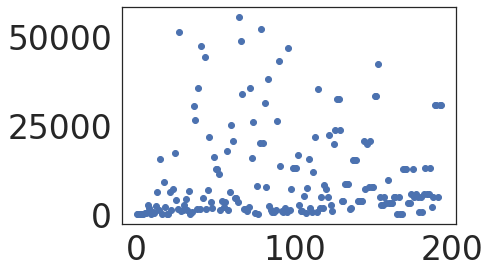

In [168]:
plt.plot([ec_classes_length[x] for x in all_selected],'o')

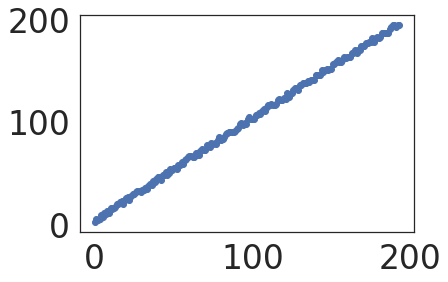

In [169]:
plt.plot([ec_classes_length[x]/fifty_clusters[x] for x in all_selected],'o')

In [171]:
for i in all_selected:
    print(i)

2.1.1.1
2.4.1.53
2.3.2.10
4.1.1.56
1.1.3.10
4.1.1.9
1.1.1.408
1.3.8.7
1.17.4.4
1.1.1.410
1.1.1.264
1.14.15.21
1.1.3.20
1.14.11.2
1.4.1.4
4.1.2.50
1.7.99.8
2.4.2.52
1.3.1.94
1.4.1.19
5.1.3.18
5.1.99.1
3.1.2.20
2.1.3.-
1.3.98.3
6.2.1.64
2.3.1.108
5.3.1.1
2.1.3.9
2.4.1.183
2.4.1.198
5.1.3.32
2.4.2.12
2.1.1.242
4.1.1.72
1.1.1.343
5.3.1.16
2.3.1.274
1.14.12.10
1.1.1.94
1.2.3.3
6.1.1.16
3.1.26.8
1.1.1.22
2.4.1.180
4.1.3.39
2.1.1.77
1.13.11.1
1.1.99.3
1.20.4.1
1.16.3.2
1.16.3.2
2.4.2.4
1.14.15.6
4.1.3.44
1.13.11.15
2.1.1.364
2.3.2.6
1.3.1.25
1.13.11.3
1.1.1.44
2.1.1.14
2.1.1.174
2.1.1.174
2.1.1.360
7.-.-.-
3.1.11.2
2.4.1.1
2.4.1.44
1.14.13.208
4.1.99.2
2.4.1.7
2.1.2.11
3.1.2.12
1.4.1.1
1.3.7.3
1.1.1.40
4.1.2.44
1.16.3.1
6.1.1.2
1.16.3.1
2.4.2.7
1.3.7.7
2.1.3.2
2.3.1.169
4.1.1.8
1.2.1.85
1.2.1.85
4.1.1.8
1.17.99.6
6.3.1.2
4.1.3.36
3.1.1.34
1.5.1.50
1.8.99.2
1.5.1.50
1.4.4.2
1.17.5.3
1.1.99.1
2.4.2.22
2.4.2.22
2.4.2.22
1.18.6.1
2.3.1.243
5.3.1.31
4.1.2.57
1.4.3.13
3.1.26.n2
1.2.1.10
5.3.1.5
1.5

# Read results and plot them

In [45]:
alnres_files = glob.glob('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/*/alnres') 

In [46]:
len(alnres_files)

129

In [47]:
def read_alnres(file):
    '''
    Read alnres and extract hits
    '''
    f = open(file,'r')
    
    hits = {}
    for line in f:
        columns = line.split()
        gen_hit = columns[0]
        if columns[0] in hits: 
            continue
        else:
            hits[gen_hit] = [columns[1], columns[2], columns[3]]
    f.close()
    
    return hits

In [48]:
values = {}

for alnres in alnres_files:
    ecclass = alnres.split('/')[-2]
    
    hits = read_alnres(alnres)
    idents = [float(x[1])*100 for x in hits.values() ]
    lengths  = [int(x[2]) for x in hits.values() ]
    #print(ecclass, np.mean(idents), np.median(idents), np.std(idents))
    if np.isnan(np.mean(idents)): continue
    values[ecclass] = []
    values[ecclass].append(np.mean(idents))
    
    ratio = ec_classes_length[ecclass]/fifty_clusters[ecclass]
    values[ecclass].append(ratio)
    values[ecclass].append(ec_classes_length[ecclass])
    values[ecclass].append(fifty_clusters[ecclass])

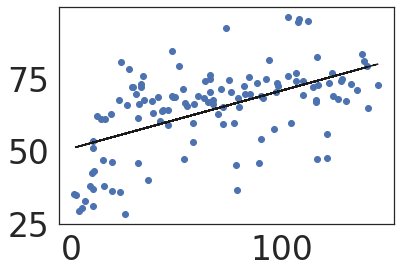

In [49]:
x = [x[1] for x in values.values()]
y = [x[0] for x in values.values()]
plt.plot(x,y,'bo')

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x, poly1d_fn(x), '--k')

In [10]:
slope, intercept, rvalue, pvalue, stderr = linregress(x,y) 
print(pvalue)
print(rvalue)

6.041666394148377e-11
0.5430369525491183


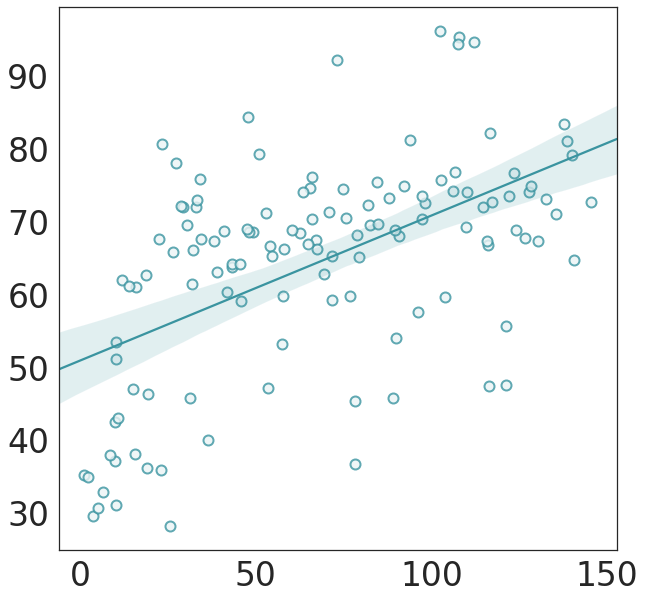

In [11]:


fig = plt.figure(figsize=(10,10))
sns.set(style="white", color_codes=True,font_scale=3)

sns.regplot(x=x,y=y,color="#EBF4F5",
            scatter_kws={'s':100, 'edgecolor':"#3a94a0",'linewidth':'2'},
            line_kws={"color": "#3a94a0"}
           );

In [25]:
ninety_clusters

{'1.14.11.40': 23,
 '1.16.1.5': 1,
 '1.14.11.37': 25,
 '2.4.1.149': 11,
 '1.1.1.237': 8,
 '1.14.12.11': 6,
 '5.1.3.23': 409,
 '3.1.1.8': 11,
 '2.1.1.169': 6,
 '2.1.1.187': 1027,
 '5.1.3.3': 9830,
 '4.1.1.111': 4362,
 '1.14.19.14': 1,
 '1.6.2.2': 3137,
 '2.4.1.13': 1118,
 '5.3.99.5': 18,
 '1.4.1.23': 224,
 '1.14.14.108': 12,
 '2.4.1.64': 223,
 '4.1.3.42': 3,
 '2.4.2.42': 7,
 '1.13.11.69': 1,
 '2.3.1.117': 5607,
 '1.1.1.1': 7194,
 '1.1.3.12': 20,
 '2.3.1.160': 2199,
 '2.4.1.80': 52,
 '1.3.5.2': 11253,
 '1.6.3.5': 141,
 '1.14.19.69': 9,
 '1.14.14.102': 4,
 '2.4.1.19': 101,
 '1.14.14.175': 2,
 '1.1.99.3': 955,
 '4.-.-.-': 8390,
 '2.3.1.184': 3203,
 '1.14.14.57': 2,
 '1.13.11.14': 4,
 '1.13.11.63': 1059,
 '5.3.3.14': 140,
 '1.1.1.330': 497,
 '2.4.1.143': 651,
 '2.4.1.134': 25,
 '1.1.1.347': 15,
 '1.8.5.3': 951,
 '2.3.3.15': 100504,
 '5.1.3.29': 102,
 '2.1.1.163': 8682,
 '3.1.1.2': 1289,
 '2.1.1.114': 32,
 '5.1.3.9': 2636,
 '1.3.1.22': 550,
 '2.3.1.287': 3,
 '2.3.1.65': 9,
 '2.3.1.12': 8660,

In [36]:
values = {}

for alnres in alnres_files:
    ecclass = alnres.split('/')[-2]
    if ecclass not in ninety_clusters: continue
    hits = read_alnres(alnres)
    idents = [float(x[1])*100 for x in hits.values() ]
    lengths  = [int(x[2]) for x in hits.values() ]
    #print(ecclass, np.mean(idents), np.median(idents), np.std(idents))
    if np.isnan(np.mean(idents)): continue
    values[ecclass] = []
    values[ecclass].append(np.mean(idents))
    
    ratio = ec_classes_length[ecclass]/ninety_clusters[ecclass]
    values[ecclass].append(ratio)
    values[ecclass].append(ec_classes_length[ecclass])
    values[ecclass].append(ninety_clusters[ecclass])
    


<Figure size 720x720 with 0 Axes>

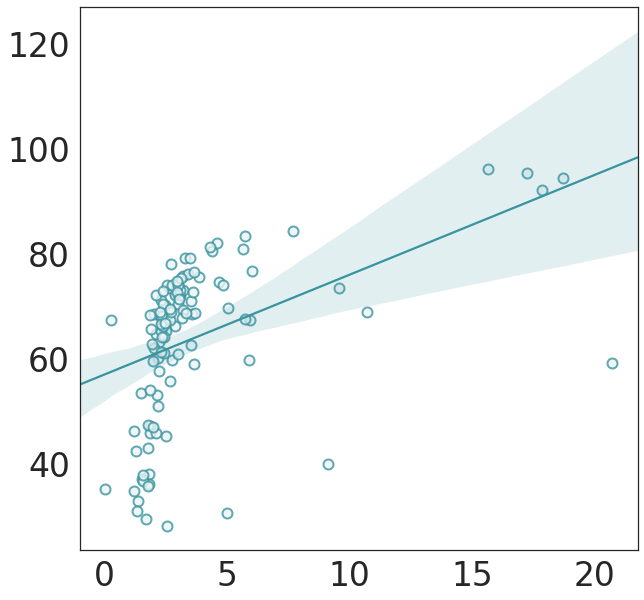

In [42]:
x = [x[1] for x in values.values()]
y = [x[0] for x in values.values()]


fig = plt.figure(figsize=(10,10))
sns.set(style="white", color_codes=True,font_scale=3)

sns.regplot(x=x,y=y,color="#EBF4F5",
            scatter_kws={'s':100, 'edgecolor':"#3a94a0",'linewidth':'2'},
            line_kws={"color": "#3a94a0"}
           );

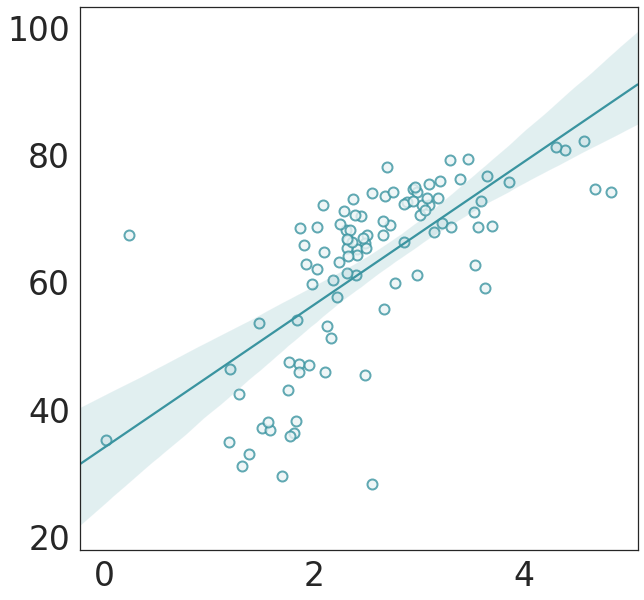

In [41]:
x = [x[1] for x in values.values() if x[1]<5]
y = [x[0] for x in values.values() if x[1]<5]


fig = plt.figure(figsize=(10,10))
sns.set(style="white", color_codes=True,font_scale=3)

sns.regplot(x=x,y=y,color="#EBF4F5",
            scatter_kws={'s':100, 'edgecolor':"#3a94a0",'linewidth':'2'},
            line_kws={"color": "#3a94a0"}
           );

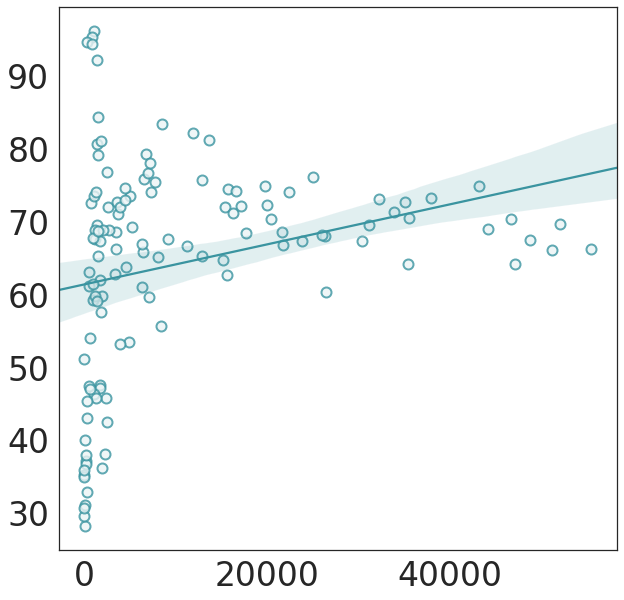

In [196]:
x = [x[2] for x in values.values()]
y = [x[0] for x in values.values()]

fig = plt.figure(figsize=(10,10))
sns.set(style="white", color_codes=True,font_scale=3)

sns.regplot(x=x,y=y,color="#EBF4F5",
            scatter_kws={'s':100, 'edgecolor':"#3a94a0",'linewidth':'2'},
            line_kws={"color": "#3a94a0"}
           );

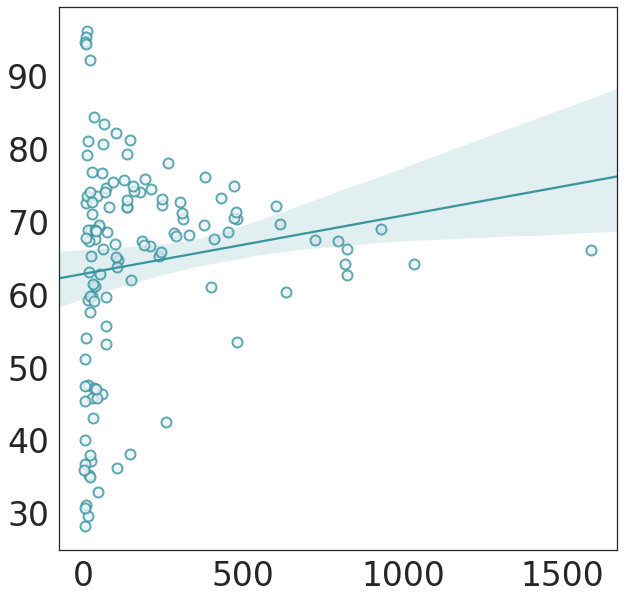

In [199]:
x = [x[3] for x in values.values()]
y = [x[0] for x in values.values()]

fig = plt.figure(figsize=(10,10))
sns.set(style="white", color_codes=True,font_scale=3)

sns.regplot(x=x,y=y,color="#EBF4F5",
            scatter_kws={'s':100, 'edgecolor':"#3a94a0",'linewidth':'2'},
            line_kws={"color": "#3a94a0"}
           );

In [85]:
## Try to do it for all values in alnres with pandas

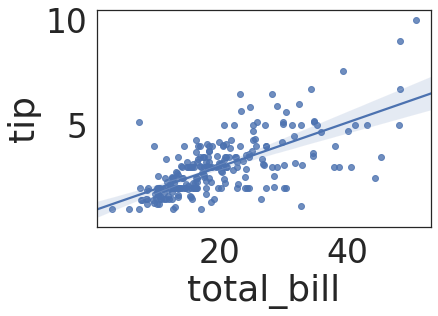

In [86]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

In [87]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# Atempt to plot with all datapoints

In [30]:
#test_list = [['a','b','c'], ['AA','BB','CC']]
idents= []
ecclasses = []
seq_per_cluster = []

for alnres in alnres_files:
    ecclass = alnres.split('/')[-2]
    if ecclass not in ninety_clusters:
        continue
        
    hits = read_alnres(alnres)
    
    idents.append([float(x[1])*100 for x in hits.values() if not np.isnan(float(x[1])) ])
    ratio = ec_classes_length[ecclass]/ninety_clusters[ecclass]
    seq_per_cluster.append([ratio for x in hits.values() if not np.isnan(float(x[1]))])
    ecclasses.append([ecclass for x in hits.values() if not np.isnan(float(x[1]))])
    

In [152]:
print(len(idents_f))
print(len(seq_per_cluster_f))
print(len(ecclasses_f))

110317
110317
110317


In [31]:
idents_f = [item for sublist in idents for item in sublist]    
seq_per_cluster_f = [item for sublist in seq_per_cluster for item in sublist]    
ecclasses_f = [item for sublist in ecclasses for item in sublist]    

data = [[x,seq_per_cluster_f[index],ecclasses_f[index]] for index,x in enumerate(idents_f)]

df = pd.DataFrame(data, columns=['identity', 'seqs_per_cluster', 'EC class'])

/agh/projects/noelia/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


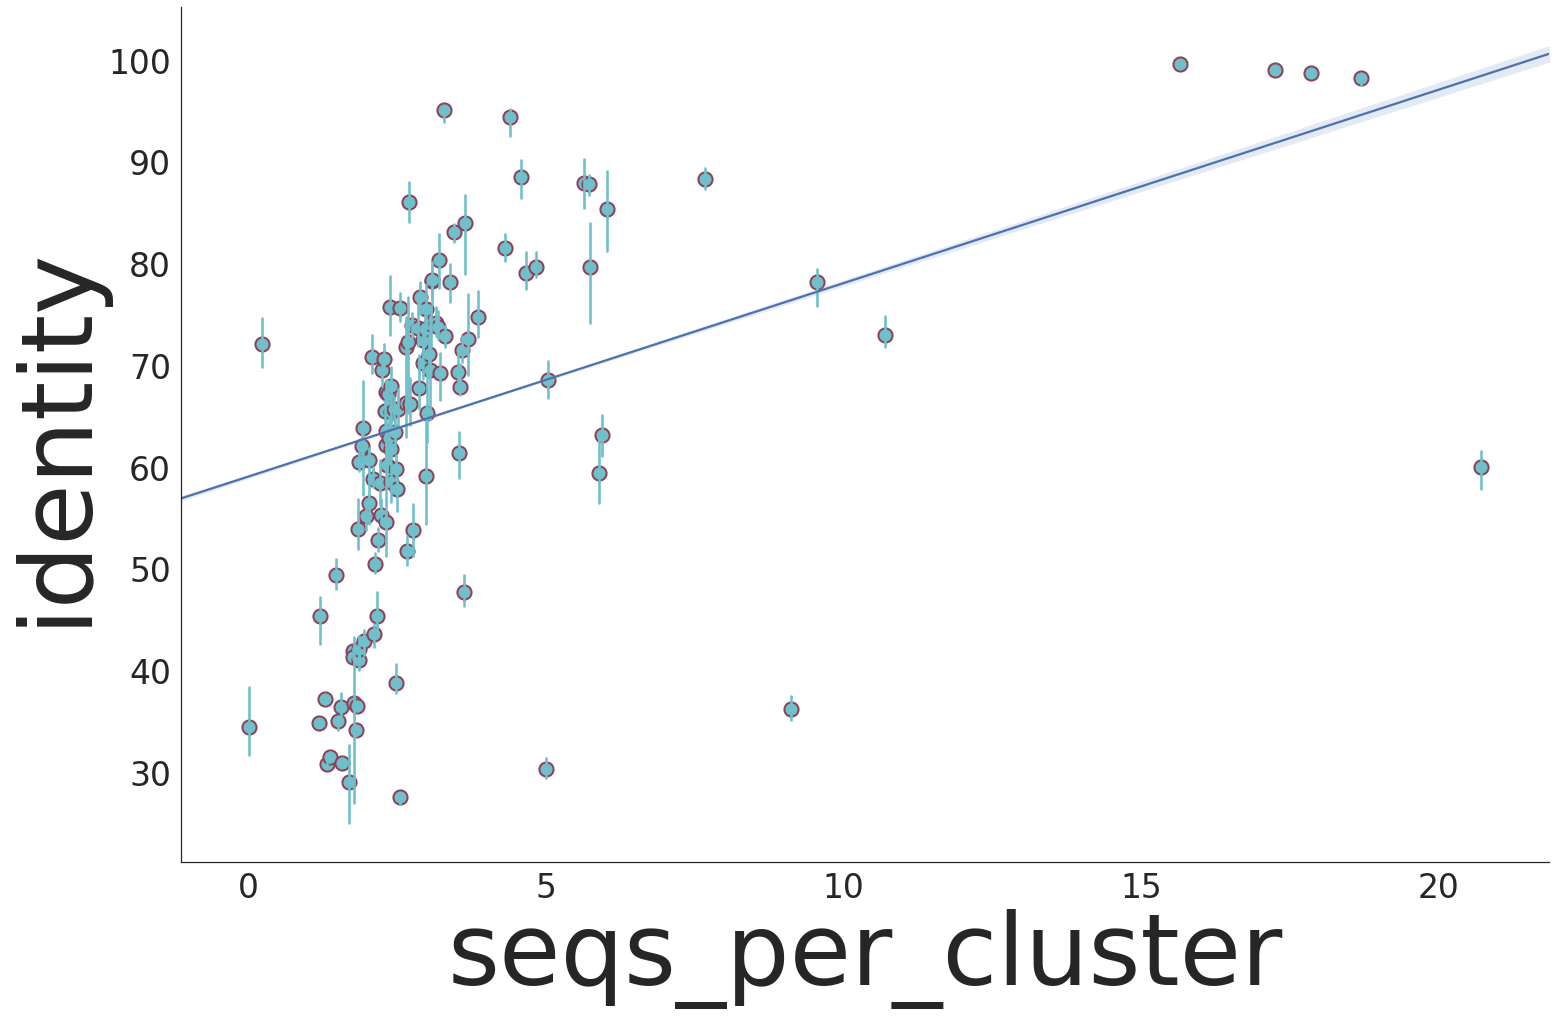

In [35]:
sns.lmplot(x="seqs_per_cluster", y="identity", 
         data=df,x_estimator=np.median, size=15, aspect=1.5,robust=True, 
           scatter_kws={'s':200,'color':"#70C0CB",'edgecolor':"#8d4057",'linewidth':'2'})
plt.rcParams["axes.labelsize"] = 100


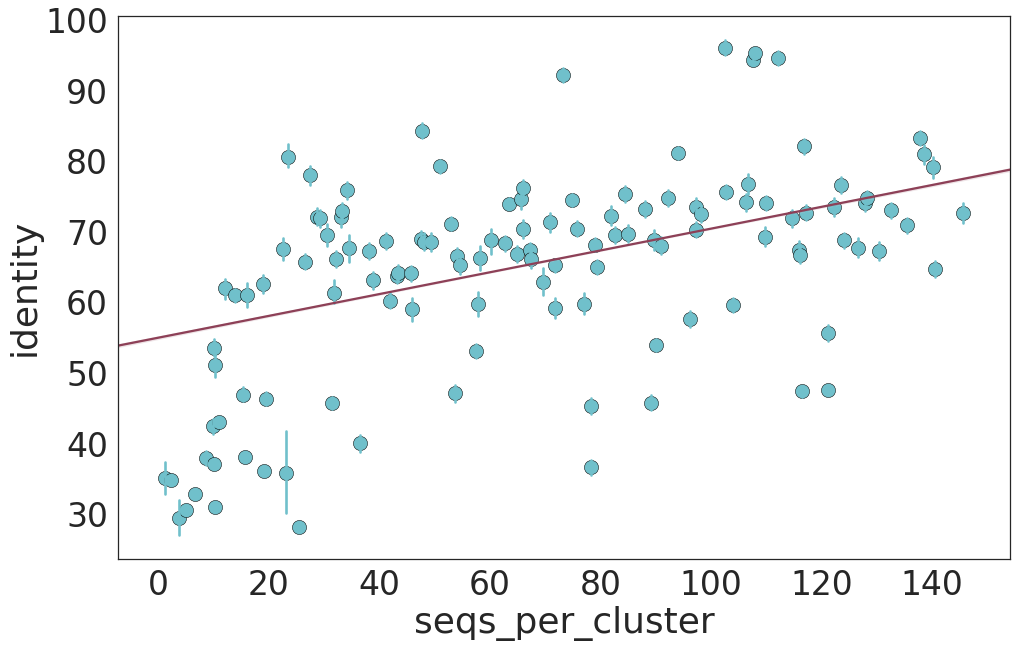

In [170]:
fig = plt.figure(figsize=(16,10))
sns.set(style="white", color_codes=True,font_scale=3)

sns.regplot(x="seqs_per_cluster", y="identity", 
             data=df,x_estimator=np.mean,
            color="#70C0CB",
            scatter_kws={'s':200,'linewidth':'0.5','edgecolor':'black'}, 
            line_kws={"color": "#8d4057"});

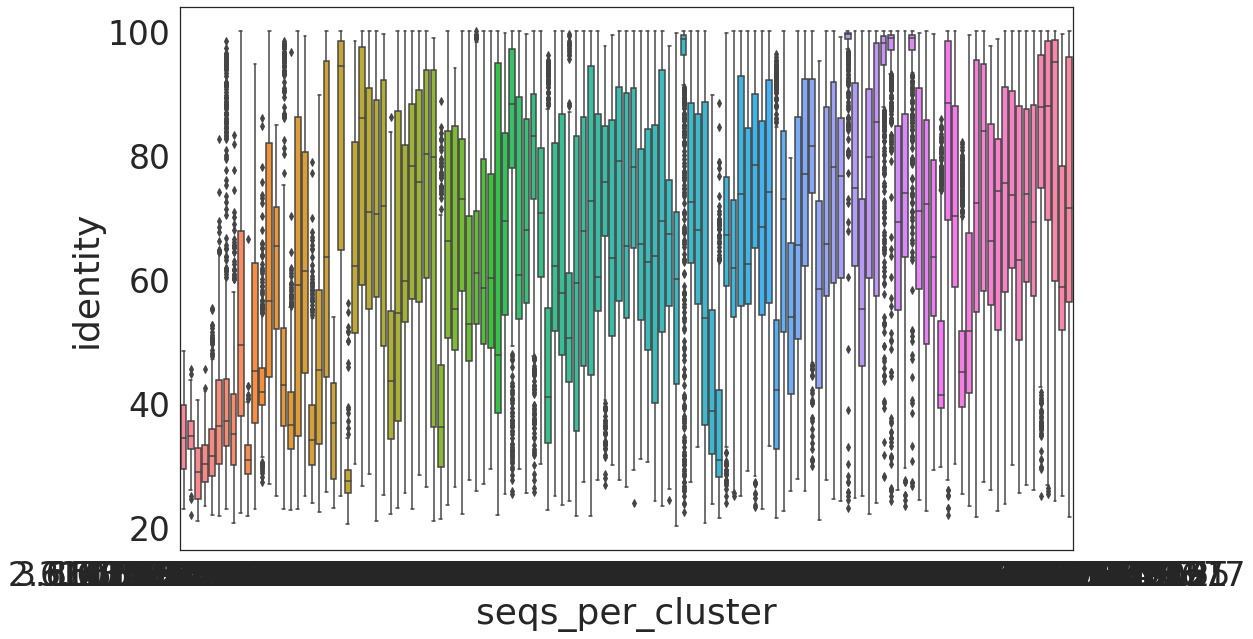

In [172]:
fig = plt.figure(figsize=(16,10))
sns.set(style="white", color_codes=True,font_scale=3)
sns.boxplot(x="seqs_per_cluster", y="identity", 
             data=df, saturation=1)

/agh/projects/noelia/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/agh/projects/noelia/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


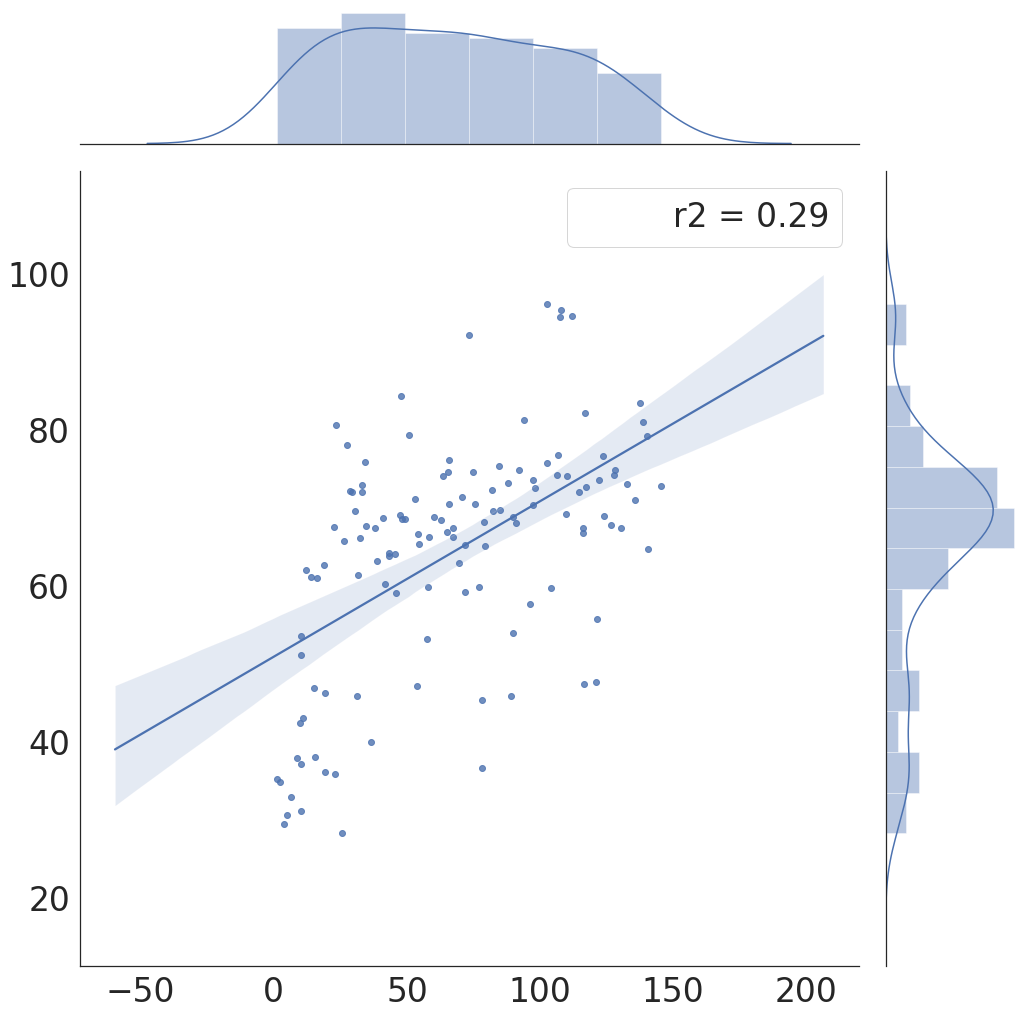

In [189]:
from scipy import stats

plt.rcParams["axes.labelsize"] = 100
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x, y, kind="reg", stat_func=r2, size=15)


# Look in detail at those sequences generating very distant groups

In [203]:
possible_data={}
for key,value in ec_classes_length.items():
    if key in fifty_clusters:
        possible_data[key] = [value,fifty_clusters[key]]


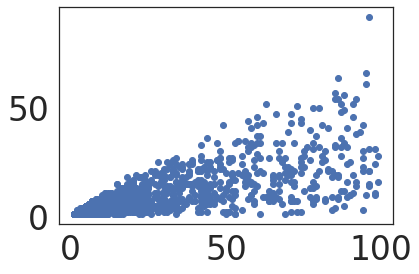

In [221]:
plt.plot([x[0] for x in possible_data.values() if x[0]<100],
         [x[1] for x in possible_data.values() if x[0]<100],'o')

In [235]:
a=[(key,value[0]/value[1],value[0]) for key,value in possible_data.items() if x[0]<100]
a.sort(key = lambda x: x[1],reverse=True)
for i in a:
    print(i)

('2.1.2.1', 6593.625, 52749)
('4.1.1.39', 2854.754716981132, 151302)
('1.97.1.12', 1598.8260869565217, 36773)
('1.2.1.41', 1439.5217391304348, 33109)
('7.1.1.3', 1272.0, 3816)
('2.4.1.129', 1227.632911392405, 96983)
('1.2.5.1', 1183.25, 4733)
('2.1.1.207', 1162.65, 23253)
('1.14.11.64', 1136.0, 1136)
('1.1.5.13', 1032.0, 1032)
('2.3.1.174', 962.8181818181819, 10591)
('5.1.3.13', 960.8214285714286, 26903)
('1.11.1.21', 935.2105263157895, 17769)
('2.1.1.177', 864.0, 24192)
('6.2.1.5', 840.9466666666667, 63071)
('2.3.1.117', 803.28, 20082)
('2.1.3.11', 738.6666666666666, 2216)
('1.10.3.9', 704.8235294117648, 23964)
('5.1.99.7', 629.0, 629)
('5.1.1.7', 608.0175438596491, 34657)
('2.3.1.180', 603.2424242424242, 39814)
('2.2.1.1', 542.4415584415584, 41768)
('1.17.1.8', 506.27272727272725, 33414)
('4.1.99.17', 501.90909090909093, 22084)
('2.4.99.15', 499.0, 499)
('1.14.99.39', 479.0, 3353)
('2.3.1.225', 476.82978723404256, 44822)
('1.3.1.98', 475.8170731707317, 39017)
('1.2.1.72', 454.1666666

In [215]:
23453/9035

2.59579413392363

In [236]:
ec_classes_length['2.4.1.126']

3

In [237]:
fifty_clusters['2.4.1.126']

3

# Selected example: 3.1.1.26

In [50]:
values

{'1.5.1.50': [72.48743455497382, 98.125, 785, 8],
 '1.6.2.2': [55.688376963350784, 121.20289855072464, 8363, 69],
 '1.1.1.343': [63.131744421906696, 38.86666666666667, 583, 15],
 '3.1.11.2': [67.39514170040485, 67.26206896551724, 48765, 725],
 '1.3.-.-': [64.71764705882353, 140.52777777777777, 15177, 108],
 '1.21.98.1': [73.50336048879836, 122.14634146341463, 5008, 41],
 '6.3.1.2': [74.81431472081219, 92.18550106609808, 43235, 469],
 '2.3.1.274': [60.25283400809717, 41.8957345971564, 26520, 633],
 '1.13.12.2': [51.08912579957356, 10.25, 41, 4],
 '1.1.3.20': [38.07657142857143, 15.569444444444445, 2242, 144],
 '2.4.2.7': [69.51678463094035, 82.5026455026455, 31186, 378],
 '2.1.1.174': [74.58589211618258, 65.55072463768116, 4523, 69],
 '2.3.1.4': [53.481892523364486, 10.106029106029107, 4861, 481],
 '1.13.11.1': [68.53943089430894, 49.225352112676056, 3495, 71],
 '5.3.3.14': [37.09134199134199, 10.047619047619047, 211, 21],
 '2.4.2.48': [47.60294715447155, 121.14285714285714, 1696, 14],


In [61]:
a=[(key,value[0],value[1],value[2],value[3]) for key,value in values.items() if x[0]<100]


In [64]:
a.sort(key = lambda x: x[2],reverse=True)

In [65]:
a

[('5.3.1.25', 72.71757451181912, 145.52, 3638, 25),
 ('1.3.-.-', 64.71764705882353, 140.52777777777777, 15177, 108),
 ('2.3.1.245', 79.1630242825607, 140.0909090909091, 1541, 11),
 ('2.3.1.251', 81.00904198062433, 138.53846153846155, 1801, 13),
 ('1.7.1.7', 83.36284263959392, 137.69354838709677, 8537, 62),
 ('1.11.1.28', 70.98568527918782, 135.4814814814815, 3658, 27),
 ('1.3.1.9', 73.08640973630833, 132.45901639344262, 32320, 244),
 ('2.3.1.16', 67.34504048582995, 130.34426229508196, 23853, 183),
 ('4.1.1.11', 74.81395348837209, 128.23376623376623, 19748, 154),
 ('4.1.1.49', 74.12538226299694, 127.85714285714286, 22375, 175),
 ('7.1.1.6', 67.75489721886336, 126.625, 1013, 8),
 ('1.14.11.55', 68.88099089989888, 124.04545454545455, 2729, 22),
 ('2.1.1.298', 76.63208502024291, 123.45614035087719, 7037, 57),
 ('1.21.98.1', 73.50336048879836, 122.14634146341463, 5008, 41),
 ('1.6.2.2', 55.688376963350784, 121.20289855072464, 8363, 69),
 ('2.4.2.48', 47.60294715447155, 121.14285714285714, 1

In [60]:
values

{'1.5.1.50': [72.48743455497382, 98.125, 785, 8],
 '1.6.2.2': [55.688376963350784, 121.20289855072464, 8363, 69],
 '1.1.1.343': [63.131744421906696, 38.86666666666667, 583, 15],
 '3.1.11.2': [67.39514170040485, 67.26206896551724, 48765, 725],
 '1.3.-.-': [64.71764705882353, 140.52777777777777, 15177, 108],
 '1.21.98.1': [73.50336048879836, 122.14634146341463, 5008, 41],
 '6.3.1.2': [74.81431472081219, 92.18550106609808, 43235, 469],
 '2.3.1.274': [60.25283400809717, 41.8957345971564, 26520, 633],
 '1.13.12.2': [51.08912579957356, 10.25, 41, 4],
 '1.1.3.20': [38.07657142857143, 15.569444444444445, 2242, 144],
 '2.4.2.7': [69.51678463094035, 82.5026455026455, 31186, 378],
 '2.1.1.174': [74.58589211618258, 65.55072463768116, 4523, 69],
 '2.3.1.4': [53.481892523364486, 10.106029106029107, 4861, 481],
 '1.13.11.1': [68.53943089430894, 49.225352112676056, 3495, 71],
 '5.3.3.14': [37.09134199134199, 10.047619047619047, 211, 21],
 '2.4.2.48': [47.60294715447155, 121.14285714285714, 1696, 14],


## 2.4.1.53 against itself

In [89]:
#1.1.1.391
brenda_matches = open('/agh/projects/noelia/NLP/zymCTRL/mmseqs-search-analysis/generation/2.4.1.53/alnres2')


In [90]:
hits = {}
for line in brenda_matches:
    columns = line.split()
    gen_hit = columns[0]
    hits[gen_hit] = [columns[1], columns[2], columns[3]]
brenda_matches.close()

In [91]:
idents

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,


In [92]:
idents = [float(x[1])*100 for x in hits.values() ]
lengths  = [int(x[2]) for x in hits.values() ]

(0, 110)

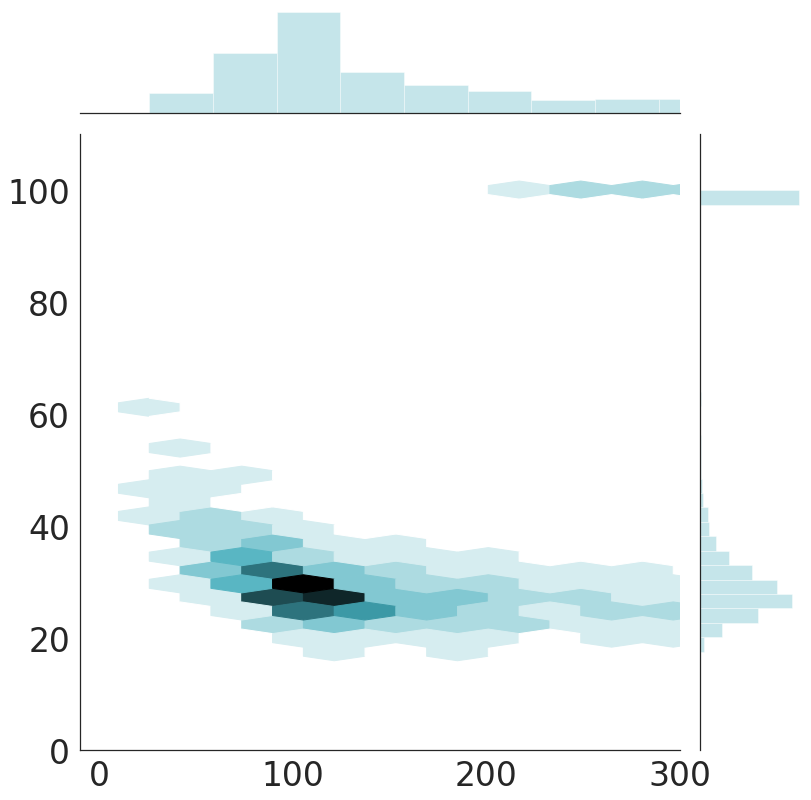

In [94]:
sns.set(style="white", color_codes=True,font_scale=3)
g = sns.jointplot(lengths,idents,kind="hex",color="#70C0CB",height=12,bins=10)

g.ax_marg_x.set_xlim(-10, 300)
g.ax_marg_y.set_ylim(0, 110)

In [ ]:
# Pi